# 머신러닝 프로젝트 진행 순서

1. 데이터 분석 문제 정의
> - 이슈 파악 및 문제 도출
> - 분석 데이터 정의
> - 머신러닝 문제 정의
> - 베이스라인 선정

2. 데이터 수집 및 정제
> - 데이터 마트 생성
> - 데이터 정합성 평가
> - 데이터 취합
> - 데이터 포맷 통일

3. 탐색적 데이터 분석
> - 결측치 처리
> - 클래식 불균형 문제
> - 데이터 시각화
> - 통계량 분석

4. 피처 엔지니어링
> - 차원의 저주
> - 상관관계 분석
> - 피쳐 추출
> - 범주형 변수 인코딩

5. 예측 모델 개발 및 평가
> - 예측 모델 학습
> - 모델 성능 개선
> - 성능 평가
> - 최종 모델 배포 


# [PUBG Finish Placement Prediction (Kernels Only)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview)
- Can you predict the battle royale finish of PUBG Players?

## 데이터 분석 문제 정의

- 이슈 파악 및 문제 도출
> - PUBG 게임을 통해 집계된 아래 통계 데이터를 확인하고, 최종 게임 내 통계 및 초기 플레이어 등급에서 최종 배치를 예측.
- 분석 데이터 정의
> - PUBG 게임에 대해 PUBG Developer API를 통해 수집된 데이터
- 머신러닝 문제 정의
> - 1(1위)에서 0(최후)까지의 척도로 최종 통계를 기반으로 선수의 최종 순위를 예측하는 모델을 찾는 것이 목표
> - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 최적의 Regression Model을 사용하고자 함.
- BaseLine 선정
> - Data 관련
>    - 결측치는 모두 제거
>    - Data Leakage와 연관된 column 제거
>    - Objective, Categorical type의 column은 모두 제거
> - Modeling 관련
>    - BaseModel은 xgboostRegressor로 선정
>    - 'target'을 제외한 모든 columns에 대한 학습 진행


## 데이터 수집 및 정제

- **Data** : Kaggle에서 제공하는 아래의 파일을 사용 예정
> - train_V2.csv
> - test_V2.csv  
      
- **Data fileds**
>  - **Id** - 플레이어 아이디
>  - **groupId** - 매치 내에서 그룹을 식별하기 위한 ID입니다.   
        같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우 매번 다른 groupId를 갖습니다.
>  - **matchId** - 일치를 식별하는 ID입니다.   
        훈련 세트와 테스트 세트 모두에 일치하는 항목이 없습니다.
>  - **assists** - 이 플레이어가 피해를 주었고 팀원들에 의해 사망한 적 플레이어의 수입니다. 팀원과 같이 싸웠다는 지표
>  - **boosts** - 사용된 부스트 아이템의 수입니다.
>  - **DamageDealt** - 가한 총 피해량입니다. 
        참고: 자신이 입힌 피해는 차감됩니다. 팀 합산
>  - **DBNO** - 다운이된 상 플레이어의 수입니다.
        - Down But No Out'의 약자입니다. 듀오나 스쿼드 플레이 중 체력(HP)을 모두 잃으면 이 모드로 진입합니다.   
        - 이 모드에서 듀오 또는 분대원은 당신을 치유할 수 있으며 이것이 우리가 이것을 아웃으로 간주하지 않는 이유입니다.   
        - 'Revive State'는 BATTLEGROUNDS의 기능으로 쓰러진 분대원을 소생시키는 데 사용할 수 있습니다.   
        - HP가 0이 되면 DBNO 상태가 됩니다.  
        - 아이템을 크롤링 및 드롭할 수만 있으며 이 상태에서는 아이템을 쏘거나 사용할 수 없습니다.
>  - **headshotKills** - 헤드샷으로 사망한 적 플레이어의 수입니다.
>  - **heals** - 사용된 치유 아이템의 수입니다.
        - PUBG에는 붕대, 응급 처치 키트 및 의료 키트의 세 가지 기본 heals 옵션이 있습니다.
>  - **killPlace** - 죽인 적 플레이어 수의 경기 순위입니다.  
>  - **killPoints** - 플레이어의 킬 기반 외부 순위입니다.  
        (이것을 킬만 중요한 Elo 순위라고 생각하십시오.)  
        rankPoints에 -1 이외의 값이 있는 경우 killPoints의 0은 "없음"으로 처리되어야 합니다.
>  - **kills** - 죽인 적 플레이어의 수.
>  - **killStreaks** - 짧은 시간에 죽인 적 플레이어의 최대 수입니다.
>  - **longKill** - 사망 시 사망한 플레이어와 플레이어 사이의 최장 거리입니다.  
        플레이어를 쓰러뜨리고 drive away하면 가장 긴 킬 통계가 나올 수 있으므로 이는 오해의 소지가 있습니다.
>  - **matchDuration** - 경기 시간(초)입니다.
>  - **matchType** - 데이터의 출처인 게임 모드를 식별하는 문자열입니다.   
        표준 모드는 "solo", "duo", "squad", "solo-fpp", "duo-fpp" 및 "squad-fpp"입니다.  
        다른 모드는 이벤트 또는 사용자 지정 일치에서 가져온 것입니다.
>  - **maxPlace** - 경기에서 데이터가 있는 최악의 위치입니다.  
        데이터가 배치를 건너뛰는 경우가 있으므로 numGroups와 일치하지 않을 수 있습니다.
>  - **numGroups** - 경기에서 데이터가 있는 그룹의 수입니다.
>  - **rankPoints** - 플레이어의 Elo와 같은 순위입니다.  
        이 순위는 일관성이 없으며 API의 다음 버전에서 더 이상 사용되지 않으므로 주의해서 사용하십시오.  
        -1 값은 "없음"을 대신합니다.
>  - **revives** - 이 플레이어가 팀원을 소생시킨 횟수입니다.
>  - **rideDistance** - 미터로 측정한 차량의 총 이동 거리입니다.
>  - **roadKills** - 차량에 있는 동안 킬 수입니다.
>  - **swimDistance** - 미터로 측정한 수영으로 이동한 총 거리.
>  - **teamKills** - 이 플레이어가 팀원을 죽인 횟수입니다.
>  - **vehicleDestroys** - 파괴된 차량의 수입니다.
>  - **walkDistance** - 미터로 측정한 도보로 이동한 총 거리.
>  - **weaponsAcquired** - 획득한 무기의 수입니다.
>  - **winPoints** - 승리 기반 플레이어의 외부 순위입니다.  
        (이것을 승리만이 중요한 Elo 순위라고 생각하십시오.)  
        rankPoints에 -1 이외의 값이 있는 경우 winPoints의 0은 "없음"으로 처리되어야 합니다.
>  - **winPlacePerc** - 예측 대상입니다.  
        이것은 백분위수 승리 배치로, 1은 1위, 0은 경기의 마지막 순위에 해당합니다.  
        numGroups가 아닌 maxPlace에서 계산되므로 일치 항목에서 청크가 누락될 수 있습니다.


## 탐색적 데이터 분석

In [29]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

### 데이터 기초 파악

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns


# 선형 회귀

# scale을 지정하여 모델을 생성
#   StandardScaler를 이용해서 학습하면 R-squared를 유지하면서 Cond. No.를 줄일수 있습니다.
from sklearn.preprocessing import StandardScaler     # 평균이 0과 표준편차가 1이 되도록 변환.
from sklearn.preprocessing import MinMaxScaler           # 최대값이 각각 1, 최소값이 0이 되도록 변환록 변환.
from sklearn.preprocessing import RobustScaler           # 중앙값(median) 0이 되도록 변환
from sklearn.preprocessing import Normalizer             # 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

new_scaler = StandardScaler()
# new_scaler = MinMaxScaler()
# new_scaler = RobustScaler()
# new_scaler = Normalizer()

# 데이터셋 분리
from sklearn.model_selection import train_test_split 

# 머신러닝 모델
#    Linear Regression
from sklearn.linear_model import LinearRegression
#    Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
#    Lasso
from sklearn.linear_model import Lasso
#    Ridge
from sklearn.linear_model import Ridge
#    SVR
from sklearn.svm import SVR
#    Decision Tree
from sklearn.tree import DecisionTreeRegressor
#    RandomForest
from sklearn.ensemble import RandomForestRegressor
#    ensenble
from sklearn.ensemble import VotingClassifier , VotingRegressor
#    lightgbm
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
#    xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor     
#    MLPRegressor
from sklearn.neural_network import MLPRegressor

# KFold(CV), partial : 데이터 검증
from sklearn.model_selection import KFold
from functools import partial

# VIF 지표 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna

# 머신러닝 회귀모델 평가지표
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, confusion_matrix,accuracy_score

# # pandas 실수 출력 셋팅
# pd.options.display.float_format = '{:.4f}'.format

# plot에 한글 폰트 정상 출력
plt.rc('font', family='NanumBarunGothic')

In [4]:
train = pd.read_csv('../../../Machine-Running_LJW/Group Project/train_V2.csv')
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
train = reduce_mem_usage(train)
train

In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float16
 26  weaponsAcquired  int16  
 27  winPoints   

In [60]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [109]:
# DataFrame 출력 시 최대 행 수 지정

pd.set_option('display.max_rows',None)   

# DataFrame 출력 시 최대 열수 지정

pd.set_option('display.max_columns',30)   

train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [314]:
train.describe(include=['O'])

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


In [5]:
# 타입별 column 종류 분류

num_columns = train.select_dtypes(exclude=['object']).columns[:-1]   # 'winPlacePerc 제외'
obj_columns = train.select_dtypes('object').columns

print(f'▶ numerical columns = {num_columns} → 총 24개의 column')
print(f'▶ objective columns = {obj_columns} → 총 4개의 column')

▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object') → 총 24개의 column
▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 column


In [5]:
# 예측값에 대한 파악

# winPlacePerc기준 상위 10%의 기록 :

per = 0.9

wper = train['winPlacePerc'].quantile(per)

train_wper = train[train['winPlacePerc']> wper]

index = num_columns
columns = ['평균', '최소', '최대', '상위10%']

dt = []

for i in num_columns :
    note = []
    note.append(train_wper[i].mean())
    note.append(train_wper[i].min())
    note.append(train_wper[i].max())
    note.append(train_wper[i].quantile(per))
    dt.append(note)

table_w = pd.DataFrame(dt, index = index, columns = columns) 

print(f'---------------------------- winPlacePerc 상위 10%의 기록')
display(table_w)

---------------------------- winPlacePerc 상위 10%의 기록


,평균,최소,최대,상위10%
assists,0.734454,0.0,20.0,2.00
boosts,3.587696,0.0,33.0,7.00
damageDealt,323.602357,0.0,6616.0,680.60
DBNOs,1.472736,0.0,53.0,4.00
headshotKills,0.684637,0.0,64.0,2.00
heals,3.377008,0.0,56.0,8.00
killPlace,16.900312,1.0,74.0,42.00
killPoints,535.276527,0.0,2156.0,1474.00
kills,2.663571,0.0,72.0,6.00
killStreaks,1.104001,0.0,20.0,2.00


In [6]:
# 예측값에 대한 파악

# winPlacePerc기준 상위 5%의 기록 :

per = 0.95

wper = train['winPlacePerc'].quantile(per)

train_wper = train[train['winPlacePerc']> wper]

index = num_columns
columns = ['평균', '최소', '최대', '상위5%']

dt = []

for i in num_columns :
    note = []
    note.append(train_wper[i].mean())
    note.append(train_wper[i].min())
    note.append(train_wper[i].max())
    note.append(train_wper[i].quantile(per))
    dt.append(note)

table_w = pd.DataFrame(dt, index = index, columns = columns) 

print(f'---------------------------- winPlacePerc 상위 5%의 기록')
display(table_w)

---------------------------- winPlacePerc 상위 5%의 기록


,평균,최소,최대,상위5%
assists,0.906613,0.0,20.0,3.000
boosts,3.908115,0.0,24.0,8.000
damageDealt,384.343029,0.0,6616.0,946.900
DBNOs,1.701884,0.0,53.0,6.000
headshotKills,0.865326,0.0,64.0,3.000
heals,3.452994,0.0,54.0,11.000
killPlace,13.465571,1.0,72.0,43.000
killPoints,555.244040,0.0,2156.0,1627.000
kills,3.286540,0.0,72.0,9.000
killStreaks,1.227738,0.0,20.0,2.000


In [55]:
# 상관계수 확인

corr = train.corr()
corr

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.0000,0.3077,0.4067,0.3011,0.1983,0.2286,-0.2901,0.0391,0.3197,0.2435,...,0.1983,0.1106,0.0119,0.0234,0.0061,0.0579,0.2903,0.2439,0.0240,0.2994
boosts,0.3077,1.0000,0.5219,0.3589,0.3347,0.5359,-0.5548,0.0083,0.5020,0.4053,...,0.2531,0.3289,0.0351,0.1080,0.0131,0.0874,0.6402,0.4066,-0.0076,0.6342
damageDealt,0.4067,0.5219,1.0000,0.7358,0.6134,0.3430,-0.6774,0.0499,0.8888,0.7036,...,0.2570,0.1409,0.0525,0.0367,0.0155,0.0812,0.3982,0.3532,0.0178,0.4405
DBNOs,0.3011,0.3589,0.7358,1.0000,0.4699,0.2655,-0.5553,0.0426,0.7078,0.6469,...,0.3010,0.1025,0.0361,0.0173,0.0694,0.0602,0.2847,0.2182,0.0111,0.2800
headshotKills,0.1983,0.3347,0.6134,0.4699,1.0000,0.1999,-0.4698,0.0240,0.6743,0.5129,...,0.1501,0.0765,0.0134,0.0285,0.0087,0.0392,0.2510,0.2176,0.0050,0.2777
heals,0.2286,0.5359,0.3430,0.2655,0.1999,1.0000,-0.3860,-0.0026,0.3118,0.2704,...,0.2367,0.2975,0.0246,0.0796,0.0354,0.0629,0.4303,0.3091,-0.0110,0.4279
killPlace,-0.2901,-0.5548,-0.6774,-0.5553,-0.4698,-0.3860,1.0000,-0.0233,-0.7305,-0.8105,...,-0.2698,-0.2362,-0.0574,-0.0894,-0.0378,-0.0736,-0.5902,-0.4901,-0.0024,-0.7191
killPoints,0.0391,0.0083,0.0499,0.0426,0.0240,-0.0026,-0.0233,1.0000,0.0362,0.0371,...,0.0120,-0.0293,-0.0042,-0.0046,-0.0397,-0.0097,0.0046,-0.0040,0.9834,0.0129
kills,0.3197,0.5020,0.8888,0.7078,0.6743,0.3118,-0.7305,0.0362,1.0000,0.8025,...,0.2533,0.1147,0.0637,0.0391,0.0176,0.0800,0.3748,0.3364,0.0069,0.4199
killStreaks,0.2435,0.4053,0.7036,0.6469,0.5129,0.2704,-0.8105,0.0371,0.8025,1.0000,...,0.2417,0.0984,0.0656,0.0346,0.0276,0.0644,0.3276,0.2754,0.0086,0.3776


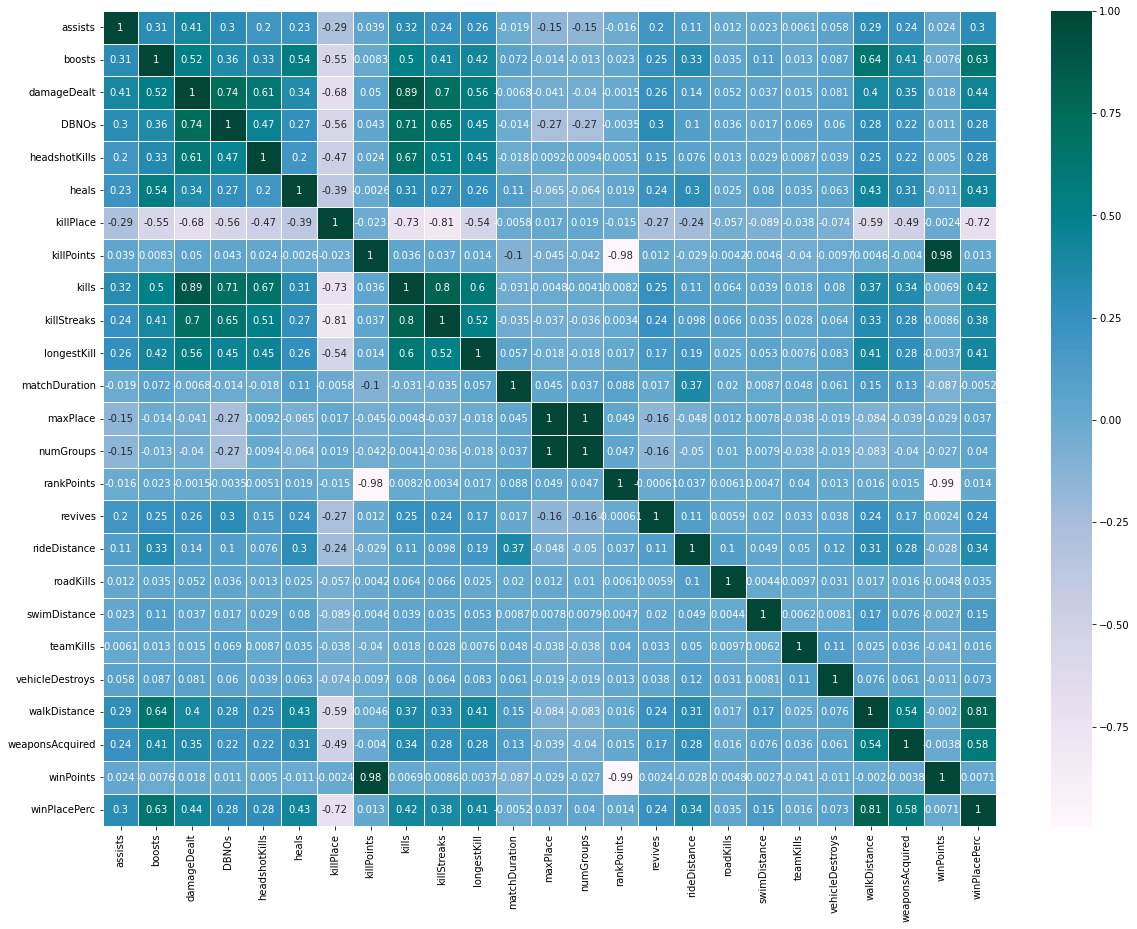

In [52]:
# numerical columns 간의 상관계수 확인

plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, linewidths=1, cmap='PuBuGn')
plt.show()

In [56]:
# 'winPlacePerc' columns와의 상관계수 확인

corr_w = corr['winPlacePerc'].sort_values(ascending = False)
corr_w.to_frame().drop(['winPlacePerc'])

,winPlacePerc
walkDistance,0.8109
boosts,0.6342
weaponsAcquired,0.5838
damageDealt,0.4405
heals,0.4279
kills,0.4199
longestKill,0.4102
killStreaks,0.3776
rideDistance,0.3429
assists,0.2994


In [200]:
# numerical columns 간의 VIF 지표 확인

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(train[num_columns].values, idx) for idx in range(train[num_columns].shape[1])],
    "features": train[num_columns].columns,
    })

,VIF Factor,features
0,1.4979,assists
1,3.3428,boosts
2,9.6948,damageDealt
3,3.7490,DBNOs
4,2.1285,headshotKills
5,1.8854,heals
6,25.0981,killPlace
7,53.2293,killPoints
8,10.9663,kills
9,7.9779,killStreaks


### BaseLine 진행

#### Data 관련

In [ ]:
# 결측치 확인

train.isnull().sum()

In [6]:
# target 1 row null data drop

train_v3 = train.dropna()

print(f'{4446966-len(train_v3)}개의 data를 삭제하였으며, 남은 data의 수는 {len(train_v3)}개 입니다.')

1개의 data를 삭제하였으며, 남은 data의 수는 4446965개 입니다.


In [7]:
# 사용할 column 선정

# 1) 'killPlace' column 제거
#     → Data Leakage 이슈 확인
#     → 참고 : https://w1647847118-lq5111919.slack.com/archives/C03J4RZLKEX/p1654752736355929

# 2) objective type column 제거
#     → 해당 : 'Id', 'groupId', 'matchId', 'matchType'

train_c = train_v3[num_columns].drop('killPlace', axis =1)
train_c.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,-1,0,0.0000,0,0.00,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,0,0,0,0.00,...,1484,0,0.0045,0,11.04,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,0,0,0,0.00,...,1491,0,0.0000,0,0.00,0,0,161.80,2,0
3,0,0,32.90,0,0,0,0,0,0,0.00,...,1408,0,0.0000,0,0.00,0,0,202.70,3,0
4,0,0,100.00,0,0,0,0,1,1,58.53,...,1560,0,0.0000,0,0.00,0,0,49.75,2,0


#### Modeling 관련

In [8]:
y = train_v3[['winPlacePerc']]
X = train_c
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446961,0.1786
4446962,0.2935
4446963,0.4815
4446964,0.8000


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,-1,0,0.0000,0,0.000,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,0,0,0,0.00,...,1484,0,0.0045,0,11.040,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,0,0,0,0.00,...,1491,0,0.0000,0,0.000,0,0,161.80,2,0
3,0,0,32.90,0,0,0,0,0,0,0.00,...,1408,0,0.0000,0,0.000,0,0,202.70,3,0
4,0,0,100.00,0,0,0,0,1,1,58.53,...,1560,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,1501,0,0.0000,0,0.000,0,0,81.70,6,0
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,1500,0,0.0000,0,2.184,0,0,788.70,4,0
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,1418,2,0.0000,0,0.000,0,0,2748.00,8,0


In [9]:
# X와 y 데이터를 train / valid로 구분해주는 함수

def sep_xy(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# 데이터셋 분리

X_train, X_valid, y_train, y_valid = sep_xy(X,y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3557572, 23), (3557572, 1), (889393, 23), (889393, 1))

- Modeling 1
> - 아래 다섯가지 모델에 대해 기본학습 진행

In [8]:
def cal_mae1(X, y, func):
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    # 학습
    model = func().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [119]:
# LinearRegression
LR = cal_mae1(X, y, LinearRegression)
LS = cal_mae1(X, y, Lasso)
RG = cal_mae1(X, y, Ridge)
XGBR = cal_mae1(X, y, XGBRegressor)
LGB = cal_mae1(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'Lasso :  mae = {LS}')
print(f'Ridge :  mae = {RG}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGBM}')

Linear Regressor :  mae = 0.11522069002061819
Lasso :  mae = 0.13007998831012754
Ridge :  mae = 0.11522068991875535
XGBRegressor :  mae = 0.09016060308986758
LGBMRegressor :  mae = 0.09070672060638306


- Modeling 2
> - PolynomialRegression

In [9]:
# Polynomial Regression 모델 적용

# 최적의 차원을 구하는 방법

def model_mae(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)   # n차방정식
    
    newX = []
    columns = []
    for i in X.columns:
        newX.append(poly_features.fit_transform(X[[i]]))
    newX = np.column_stack(newX)
    newX_df = pd.DataFrame(newX)
    
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = train_test_split(newX_df, y, test_size=0.2, random_state=42)
    
    # 학습
    model = LinearRegression().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [10]:
# 1차원에서 5차원까지 학습

evaluation_df = pd.DataFrame(columns=["degree", "mae"])
for degree in range(1, 6):
    mae = model_mae(degree)
    evaluation_df.loc[len(evaluation_df)] = [degree, mae]
evaluation_df

,degree,mae
0,1.0,0.115221
1,2.0,0.101052
2,3.0,0.098656
3,4.0,0.121517
4,5.0,0.165260


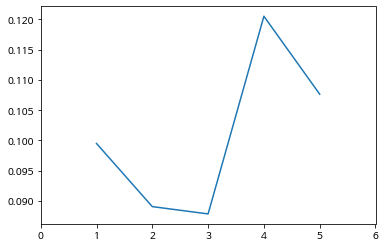

In [24]:
# degree 3이 가장 적당
# 차원이 증가함에 따라 계산량이 많아짐, 계산량이 많아지면 모델성능의 이득도 증가해야 함
# 차원이 증가할수록 모델에 대한 성능의 이득이 가장 많은 차원을 결정
plt.plot(evaluation_df["degree"], evaluation_df["mae"])
plt.xticks(list(range(len(evaluation_df)+2)))

plt.show()

# 선형회귀보다는 3차원으로 해석하는 것이 좋은데, 그렇게 해석하려고 하니 무엇이 문제인가?
# 선형회귀를 쓰자니 속도가 빠르고, 3차원으로 하자니 계산 양이 많아짐. -> 예측 속도에 대한 고민

- Modeling 3
> - xgboostRegressor에 CrossValidation 라이브러리 및 기본적인 하이퍼파라미터 설정을 통해 MAE스코어 계산
> - sklearn KFold 라이브러리를 이용하여 동일한 조건으로 xgboostRegressor에 대한 CrossValidation 진행한 MAE 스코어 계산
> - 두번의 BaseModel CrossValidation mae 스코어를 바탕으로 성능 개선 예정

In [74]:
def cal_xgb1(X,y):
            
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    params = {'booster':'gbtree',
                'gamma':0,
                'learning_rate':0.05,
                'max_depth':5,
                'min_child_weight':1,
                'n_jobs':-1,
                'objective':'reg:squaredlogerror',
                'reg_alpha':0,
              'eval_metric' : 'mae',
             'random_state':42}

    xgb_cv = xgb.cv(
      num_boost_round=100,
      params = params,
      dtrain = dtrain,
      nfold=5,
      as_pandas = True
    )
    
    return xgb_cv

In [75]:
cal_xgb1(X_train, y_train)

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.256232,0.000037,0.256233,0.000154
1,0.244335,0.000040,0.244338,0.000160
2,0.233525,0.000040,0.233529,0.000170
3,0.223635,0.000040,0.223639,0.000177
4,0.214565,0.000040,0.214570,0.000180
...,...,...,...,...
95,0.091998,0.000039,0.092081,0.000111
96,0.091943,0.000041,0.092026,0.000109
97,0.091891,0.000038,0.091975,0.000112
98,0.091846,0.000038,0.091931,0.000113


In [78]:
# eval_set 하이퍼파라미터를 사용하면 아래와 같이 결과를 출력합니다

def cal_xgb2(X,y):

    model = xgb.XGBRegressor(
        n_estimators=100,
        booster='gbtree',
        gamma=0,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_jobs=-1,
        objective='reg:squaredlogerror',
        # 주의: XGBRegressor는 sklearn mean_absolute_error 사용 (안하면 출력은 reg:squaredlogerror 값만 출력 됨)
        # xgb.cv 같은 경우 'mae'로 설정해야 됩니다.
        eval_metric=mean_absolute_error,
        reg_alpha=0,
        random_state=42)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

In [79]:
cal_xgb2(X,y)

[0]	validation_0-rmsle:0.20636	validation_0-mean_absolute_error:0.25632
[1]	validation_0-rmsle:0.19694	validation_0-mean_absolute_error:0.24443
[2]	validation_0-rmsle:0.18838	validation_0-mean_absolute_error:0.23363
[3]	validation_0-rmsle:0.18059	validation_0-mean_absolute_error:0.22373
[4]	validation_0-rmsle:0.17347	validation_0-mean_absolute_error:0.21467
[5]	validation_0-rmsle:0.16695	validation_0-mean_absolute_error:0.20633
[6]	validation_0-rmsle:0.16096	validation_0-mean_absolute_error:0.19862
[7]	validation_0-rmsle:0.15545	validation_0-mean_absolute_error:0.19148
[8]	validation_0-rmsle:0.15038	validation_0-mean_absolute_error:0.18488
[9]	validation_0-rmsle:0.14569	validation_0-mean_absolute_error:0.17874
[10]	validation_0-rmsle:0.14138	validation_0-mean_absolute_error:0.17306
[11]	validation_0-rmsle:0.13740	validation_0-mean_absolute_error:0.16776
[12]	validation_0-rmsle:0.13375	validation_0-mean_absolute_error:0.16289
[13]	validation_0-rmsle:0.13037	validation_0-mean_absolute_er

[13]	validation_0-rmsle:0.13028	validation_0-mean_absolute_error:0.15819
[14]	validation_0-rmsle:0.12717	validation_0-mean_absolute_error:0.15396
[15]	validation_0-rmsle:0.12429	validation_0-mean_absolute_error:0.14999
[16]	validation_0-rmsle:0.12163	validation_0-mean_absolute_error:0.14628
[17]	validation_0-rmsle:0.11919	validation_0-mean_absolute_error:0.14284
[18]	validation_0-rmsle:0.11692	validation_0-mean_absolute_error:0.13960
[19]	validation_0-rmsle:0.11483	validation_0-mean_absolute_error:0.13661
[20]	validation_0-rmsle:0.11292	validation_0-mean_absolute_error:0.13382
[21]	validation_0-rmsle:0.11117	validation_0-mean_absolute_error:0.13123
[22]	validation_0-rmsle:0.10956	validation_0-mean_absolute_error:0.12881
[23]	validation_0-rmsle:0.10805	validation_0-mean_absolute_error:0.12651
[24]	validation_0-rmsle:0.10667	validation_0-mean_absolute_error:0.12439
[25]	validation_0-rmsle:0.10541	validation_0-mean_absolute_error:0.12243
[26]	validation_0-rmsle:0.10423	validation_0-mean_a

[26]	validation_0-rmsle:0.10422	validation_0-mean_absolute_error:0.12057
[27]	validation_0-rmsle:0.10315	validation_0-mean_absolute_error:0.11885
[28]	validation_0-rmsle:0.10215	validation_0-mean_absolute_error:0.11722
[29]	validation_0-rmsle:0.10124	validation_0-mean_absolute_error:0.11570
[30]	validation_0-rmsle:0.10041	validation_0-mean_absolute_error:0.11428
[31]	validation_0-rmsle:0.09963	validation_0-mean_absolute_error:0.11296
[32]	validation_0-rmsle:0.09892	validation_0-mean_absolute_error:0.11174
[33]	validation_0-rmsle:0.09827	validation_0-mean_absolute_error:0.11060
[34]	validation_0-rmsle:0.09766	validation_0-mean_absolute_error:0.10951
[35]	validation_0-rmsle:0.09710	validation_0-mean_absolute_error:0.10850
[36]	validation_0-rmsle:0.09659	validation_0-mean_absolute_error:0.10758
[37]	validation_0-rmsle:0.09613	validation_0-mean_absolute_error:0.10671
[38]	validation_0-rmsle:0.09570	validation_0-mean_absolute_error:0.10589
[39]	validation_0-rmsle:0.09527	validation_0-mean_a

[39]	validation_0-rmsle:0.09521	validation_0-mean_absolute_error:0.10510
[40]	validation_0-rmsle:0.09484	validation_0-mean_absolute_error:0.10438
[41]	validation_0-rmsle:0.09447	validation_0-mean_absolute_error:0.10367
[42]	validation_0-rmsle:0.09415	validation_0-mean_absolute_error:0.10304
[43]	validation_0-rmsle:0.09385	validation_0-mean_absolute_error:0.10242
[44]	validation_0-rmsle:0.09357	validation_0-mean_absolute_error:0.10184
[45]	validation_0-rmsle:0.09331	validation_0-mean_absolute_error:0.10132
[46]	validation_0-rmsle:0.09307	validation_0-mean_absolute_error:0.10081
[47]	validation_0-rmsle:0.09286	validation_0-mean_absolute_error:0.10035
[48]	validation_0-rmsle:0.09266	validation_0-mean_absolute_error:0.09993
[49]	validation_0-rmsle:0.09247	validation_0-mean_absolute_error:0.09951
[50]	validation_0-rmsle:0.09227	validation_0-mean_absolute_error:0.09907
[51]	validation_0-rmsle:0.09209	validation_0-mean_absolute_error:0.09868
[52]	validation_0-rmsle:0.09193	validation_0-mean_a

[52]	validation_0-rmsle:0.09195	validation_0-mean_absolute_error:0.09835
[53]	validation_0-rmsle:0.09180	validation_0-mean_absolute_error:0.09801
[54]	validation_0-rmsle:0.09165	validation_0-mean_absolute_error:0.09767
[55]	validation_0-rmsle:0.09152	validation_0-mean_absolute_error:0.09735
[56]	validation_0-rmsle:0.09140	validation_0-mean_absolute_error:0.09708
[57]	validation_0-rmsle:0.09129	validation_0-mean_absolute_error:0.09681
[58]	validation_0-rmsle:0.09118	validation_0-mean_absolute_error:0.09656
[59]	validation_0-rmsle:0.09108	validation_0-mean_absolute_error:0.09629
[60]	validation_0-rmsle:0.09097	validation_0-mean_absolute_error:0.09605
[61]	validation_0-rmsle:0.09088	validation_0-mean_absolute_error:0.09583
[62]	validation_0-rmsle:0.09079	validation_0-mean_absolute_error:0.09561
[63]	validation_0-rmsle:0.09071	validation_0-mean_absolute_error:0.09543
[64]	validation_0-rmsle:0.09064	validation_0-mean_absolute_error:0.09525
[65]	validation_0-rmsle:0.09057	validation_0-mean_a

0.09189336095186622

### 컬럼별 분석

#### 컬럼 분류

- 순위와 연관성 있는 columns끼리 분류

- 구분 기준 : 돌아다니면서 많이 죽이고, 많이 회복해야 한다고 판단  
    (아래는 column : winPlacePerc와의 상관계수를 의미)

    1. kill 관련 columns   
    > 01) assists                 :  0.2994  
    > 02) damageDealt             :  0.4405  
    > 03) DBNOs                   :  0.2800  
    > 04) headshotKills           :  0.2777  
    > 05) killPlace               : -0.7191  
    > 06) kills                   :  0.4199  
    > 07) killStreaks             :  0.3766  
    > 08) longestKill             :  0.4102  
    > 09) roadKills               :  0.0345  
    > 10) teamKills               :  0.0159  
    > 11) weaponsAcquired         :  0.5838  

    2. heal 관련 columns  
    > 1) boosts                   :  0.6342  
    > 2) heals                    :  0.4279  
    > 3) revives                  :  0.2409  
    
    3. move 관련 columns  
    > 1) walkDistance             :  0.8109  
    > 2) rideDistance             :  0.3429  
    > 3) swimDistance             :  0.1496  
    
    4. 기타 columns  
    > 01) killPoints              :  0.0129  
    > 02) matchDuration           : -0.0052  
    > 03) maxPlace                :  0.0374  
    > 04) numGroups               :  0.0396  
    > 05) rankPoints              :  0.0135  
    > 06) vehickeDestroys         :  0.0734  
    > 07) winPoints               :  0.0071  

In [10]:
# 컬럼 분류

# kill 관련
cols_k = ['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'kills', 'killStreaks', 'longestKill', 'roadKills', 'teamKills', 'weaponsAcquired']

# heal 관련
cols_h = ['boosts', 'heals', 'revives']

# move 관련
cols_m = ['walkDistance', 'rideDistance', 'swimDistance']

# 기타
cols_e = ['killPoints', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'vehickeDestorys', 'winPoints']

In [11]:
# excols : 데이터프레임의 컬럼들 중 해당 컬럼들을 제외한 컬럼들을 리스트로 반환
def excols(df, cols):
    return [i for i in list(df.columns) if i not in cols]

# mkdf : 지정한 데이터프레임에서 해당 컬럼들의 데이터만 추출
def mkdf(df, cols):
    return df[cols]

# exdf : 지정한 데이터프레임에서 해당 컬럼들을 제외한 데이터만 추출
def exdf(df, cols):
    return df[excols(df,cols)]

In [13]:
# 각 컬럼별 상위 ??%에 해당하는 데이터값 확인

def cal(df, columns_list, want_per):    
    value_list = []
    
    for i in columns_list:
        value_list.append(df[i].quantile(want_per))
        print(f'winPlacePerc 컬럼의 상위 {want_per}% 데이터 값은 {df[i].quantile(want_per)}입니다.')
    return '---'

In [324]:
# 상위 99%

cal(train_v3, num_columns, 0.99)
cal(train_v3, ['winPlacePerc'], 0.99)

winPlacePerc 컬럼의 상위 0.99% 데이터 값은 3.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 7.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 776.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 5.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 3.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 12.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 96.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 1671.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 7.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 3.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 243.75입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 2052.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 99.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 97.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 1749.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 2.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 6968.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 0.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 123.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 1.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 0.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 4396.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 값은 10.0입니다.
winPlacePerc 컬럼의 상위 0.99% 데이터 

'---'

In [325]:
# 상위 95%

cal(train_v3, num_columns, 0.95)
cal(train_v3, ['winPlacePerc'], 0.95)

winPlacePerc 컬럼의 상위 0.95% 데이터 값은 1.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 5.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 459.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 3.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 1.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 7.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 91.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 1491.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 4.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 2.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 126.125입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 1963.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 97.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 95.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 1573.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 1.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 4048.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 0.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 11.4296875입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 0.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 0.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 3396.0입니다.
winPlacePerc 컬럼의 상위 0.95% 데이터 값은 8.0입니다.
winPlacePerc 컬럼의 상위 0.95% 

'---'

#### kill 관련 columns 기준

In [38]:
# 상관관계 파악
train_k = mkdf(train_v3, cols_k)
corr_k = train_k.corr()
corr_k

,assists,damageDealt,DBNOs,headshotKills,kills,killStreaks,longestKill,roadKills,teamKills,weaponsAcquired
assists,1.000000,0.406726,0.301057,0.198289,0.319690,0.243471,0.261425,0.011903,0.006081,0.243882
damageDealt,0.406726,1.000000,0.735763,0.613409,0.888783,0.703599,0.563837,0.052487,0.015468,0.353248
DBNOs,0.301057,0.735763,1.000000,0.469923,0.707848,0.646872,0.451422,0.036093,0.069430,0.218161
headshotKills,0.198289,0.613409,0.469923,1.000000,0.674275,0.512882,0.447261,0.013369,0.008658,0.217552
kills,0.319690,0.888783,0.707848,0.674275,1.000000,0.802500,0.602936,0.063651,0.017601,0.336414
killStreaks,0.243471,0.703599,0.646872,0.512882,0.802500,1.000000,0.515097,0.065575,0.027612,0.275373
longestKill,0.261425,0.563837,0.451422,0.447261,0.602936,0.515097,1.000000,0.025214,0.007604,0.276264
roadKills,0.011903,0.052487,0.036093,0.013369,0.063651,0.065575,0.025214,1.000000,0.009684,0.016494
teamKills,0.006081,0.015468,0.069430,0.008658,0.017601,0.027612,0.007604,0.009684,1.000000,0.035918
weaponsAcquired,0.243882,0.353248,0.218161,0.217552,0.336414,0.275373,0.276264,0.016494,0.035918,1.000000


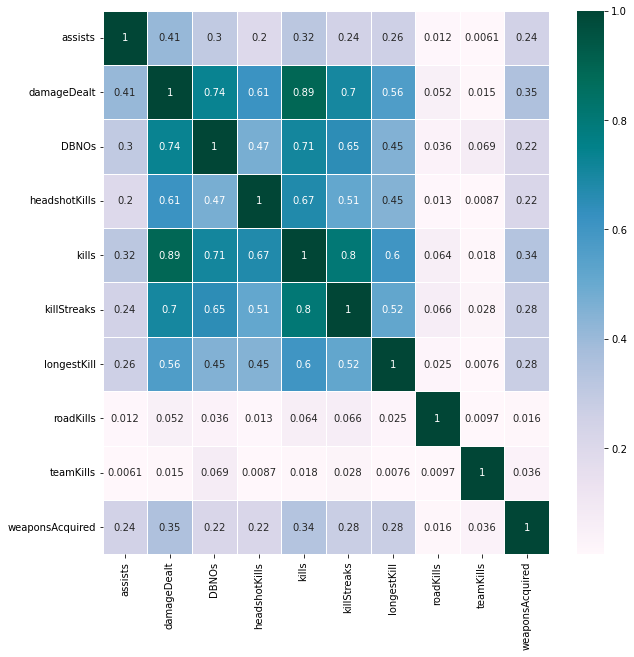

In [71]:
# 상관관계 시각화
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_k, annot=True, linewidths=1, cmap='PuBuGn')
plt.show()

In [41]:
# column 간의 VIF 지표 확인

def VIF(df): 
    return pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(df.values, idx) for idx in range(df.shape[1])],
        "features": df.columns,
        })

In [328]:
VIF(train_k)

,VIF Factor,features
0,1.4308,assists
1,9.0352,damageDealt
2,3.1762,DBNOs
3,2.1251,headshotKills
4,10.0872,kills
5,4.4338,killStreaks
6,1.9432,longestKill
7,1.0091,roadKills
8,1.0284,teamKills
9,2.0089,weaponsAcquired


In [82]:
# column을 하나씩 제외했을 때, VIF 지표 확인

for i in cols_k:
    train_ki = train_k.drop(i, axis=1)
    print(f'------ VIF 확인 : {i} column 제외 ------')
    print(VIF(train_ki))
    print(f'-------------- completed ---------------')

------ VIF 확인 : assists column 제외 ------
   VIF Factor         features
0      8.5327      damageDealt
1      3.1729            DBNOs
2      2.1214    headshotKills
3     10.0406            kills
4      4.4268      killStreaks
5      1.9344      longestKill
6      1.0091        roadKills
7      1.0283        teamKills
8      1.9768  weaponsAcquired
-------------- completed ---------------
------ VIF 확인 : damageDealt column 제외 ------
   VIF Factor         features
0      1.3512          assists
1      2.8060            DBNOs
2      2.1195    headshotKills
3      6.4508            kills
4      4.4195      killStreaks
5      1.9412      longestKill
6      1.0091        roadKills
7      1.0278        teamKills
8      1.7973  weaponsAcquired
-------------- completed ---------------
------ VIF 확인 : DBNOs column 제외 ------
   VIF Factor         features
0      1.4293          assists
1      7.9821      damageDealt
2      2.1243    headshotKills
3     10.0731            kills
4      4.2152     

In [42]:
# kill column 제거 후 다시 보기

# column을 하나씩 제외했을 때, VIF 지표 확인

cols_kk = [i for i in cols_k if i != 'kills']

train_kk = mkdf(train_k, cols_kk)

for i in cols_kk:
    train_kki = train_kk.drop(i, axis=1)
    print(f'------ VIF 확인 : {i} column 제외 ------')
    print(VIF(train_kki))
    print(f'-------------- completed ---------------')

------ VIF 확인 : assists column 제외 ------
   VIF Factor         features
0    5.432724      damageDealt
1    3.168959            DBNOs
2    1.893725    headshotKills
3    3.487036      killStreaks
4    1.877947      longestKill
5    1.008011        roadKills
6    1.028035        teamKills
7    1.910507  weaponsAcquired
-------------- completed ---------------
------ VIF 확인 : damageDealt column 제외 ------
   VIF Factor         features
0    1.339095          assists
1    2.514440            DBNOs
2    1.702306    headshotKills
3    3.182080      killStreaks
4    1.826875      longestKill
5    1.007248        roadKills
6    1.026166        teamKills
7    1.795813  weaponsAcquired
-------------- completed ---------------
------ VIF 확인 : DBNOs column 제외 ------
   VIF Factor         features
0    1.422952          assists
1    4.580584      damageDealt
2    1.902264    headshotKills
3    3.255698      killStreaks
4    1.883306      longestKill
5    1.007819        roadKills
6    1.020390     

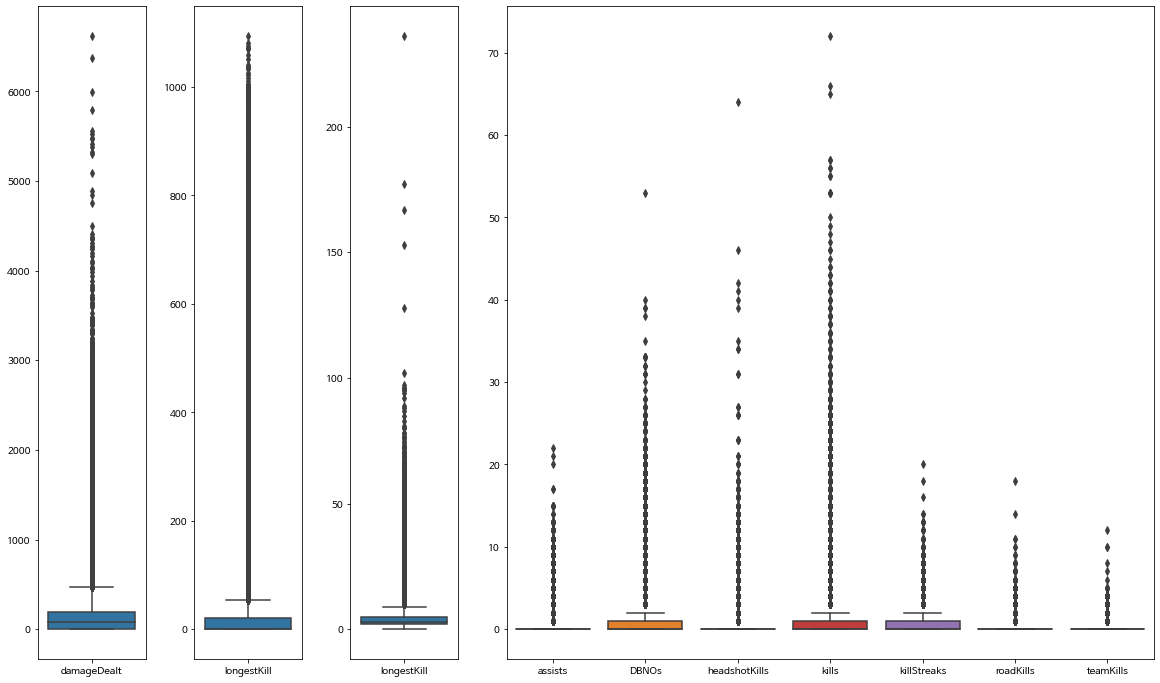

In [340]:
# kills column 기준으로 boxplot 체크

fig = plt.figure(figsize=(20,12))

spec = grs.GridSpec(ncols=4, nrows=1,width_ratios=[1, 1, 1, 6])

ax01 = fig.add_subplot(spec[0])
sns.boxplot(data=train_k['damageDealt'])
plt.xticks([0], ['damageDealt'])

ax02 = fig.add_subplot(spec[1])
sns.boxplot(data=train_k['longestKill'])
plt.xticks([0], ['longestKill'])

ax03 = fig.add_subplot(spec[2])
sns.boxplot(data=train_k['weaponsAcquired'])
plt.xticks([0], ['longestKill'])

ax04 = fig.add_subplot(spec[3])
sns.boxplot(data=train_k.drop(columns =['damageDealt', 'longestKill', 'weaponsAcquired']))

plt.show()

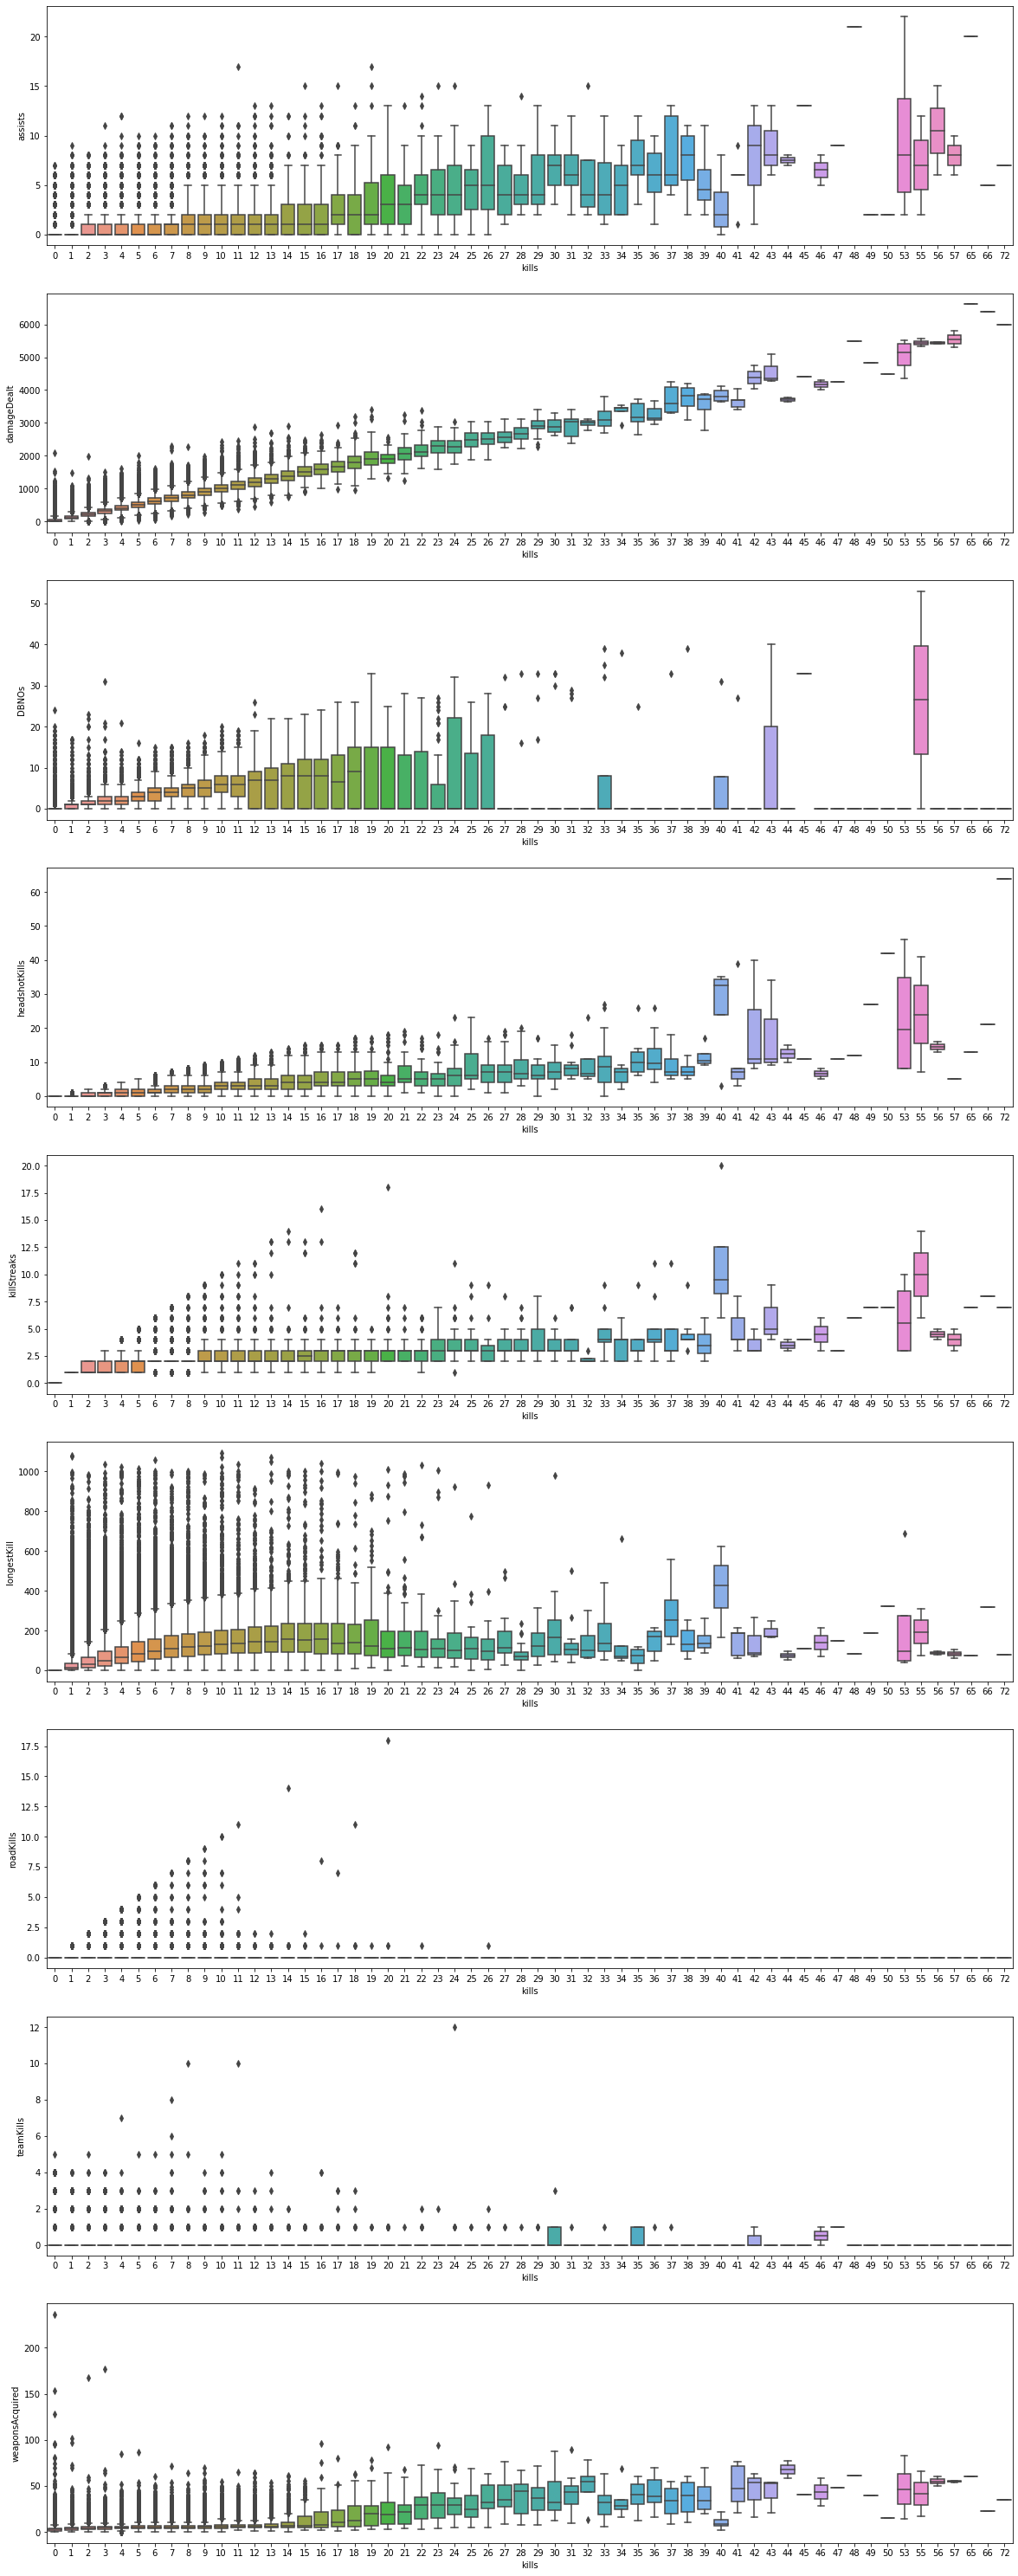

In [213]:
fig = plt.figure(figsize=(20,60))

spec = grs.GridSpec(ncols=1, nrows=10)

cols_ki = [i for i in cols_k if i != 'kills']

for i in range(9):
    ax01 = fig.add_subplot(spec[i])
    sns.boxplot(x = 'kills', y = train_k[cols_ki[i]], data=train_k)
    
plt.show()

In [250]:
# kill 기준 상위 95%의 기록

per = 0.95

kper = train_v3['kills'].quantile(per)

train_k95 = train_v3[train_v3['kills']> kper]

index = cols_ki
columns = ['평균', '최소', '최대', '상위5%']

dt = []

for i in cols_k :
    note = []
    note.append(train_k95[i].mean())
    note.append(train_k95[i].min())
    note.append(train_k95[i].max())
    note.append(train_k95[i].quantile(per))
    dt.append(note)

table_k = pd.DataFrame(dt, index = index, columns = columns, dtype = float) 

print(f'---------------------------- kills 상위 5%의 기록')
display(table_k)

---------------------------- kills 상위 5%의 기록


,평균,최소,최대,상위5%
assists,0.8840,0.0000,22.0000,3.0000
damageDealt,678.9196,50.3000,6616.0000,1164.3000
DBNOs,3.5372,0.0000,53.0000,8.0000
headshotKills,1.7261,0.0000,64.0000,4.0000
killStreaks,1.9739,1.0000,20.0000,3.0000
longestKill,121.6328,0.0000,1094.0000,290.1000
roadKills,0.0185,0.0000,18.0000,0.0000
teamKills,0.0237,0.0000,12.0000,0.0000
weaponsAcquired,6.0708,0.0000,96.0000,11.0000


In [251]:
# kill 기준 상위 99%의 기록

per = 0.99

kper = train_v3['kills'].quantile(per)

train_kper = train_v3[train_v3['kills']> kper]

index = cols_ki
columns = ['평균', '최소', '최대', '상위95%']

dt = []

for i in cols_k :
    note = []
    note.append(train_kper[i].mean())
    note.append(train_kper[i].min())
    note.append(train_kper[i].max())
    note.append(train_kper[i].quantile(per))
    dt.append(note)

table_k = pd.DataFrame(dt, index = index, columns = columns, dtype = float) 

print(f'---------------------------- kills 상위 1%의 기록')
display(table_k)

---------------------------- kills 상위 1%의 기록


,평균,최소,최대,상위95%
assists,1.2618,0.0000,22.0000,7.0000
damageDealt,1010.5631,215.2000,6616.0000,2325.0000
DBNOs,5.0065,0.0000,53.0000,16.0000
headshotKills,2.8015,0.0000,64.0000,10.0000
killStreaks,2.2700,1.0000,20.0000,5.0000
longestKill,152.5717,0.0000,1094.0000,569.5680
roadKills,0.0248,0.0000,18.0000,1.0000
teamKills,0.0243,0.0000,12.0000,1.0000
weaponsAcquired,7.6631,0.0000,96.0000,40.0000


#### heal 관련 columns 기준

In [78]:
# 상관관계 파악
train_h = mkdf(train_v3, cols_h)
corr_h = train_h.corr()
corr_h

,boosts,heals,revives
boosts,1.0000,0.5359,0.2531
heals,0.5359,1.0000,0.2367
revives,0.2531,0.2367,1.0000


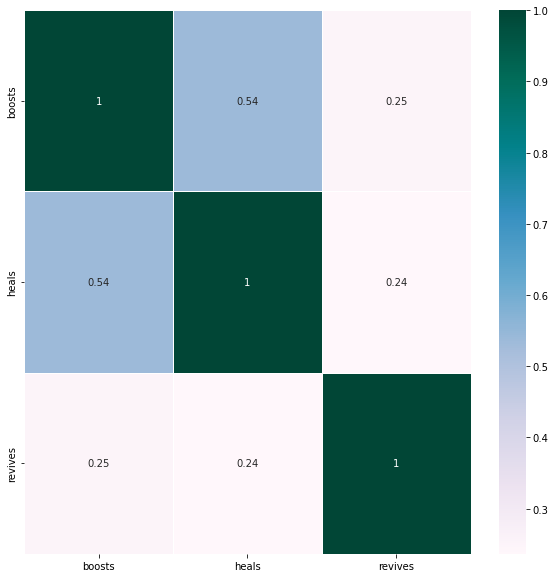

In [79]:
# 상관관계 시각화
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_h, annot=True, linewidths=1, cmap='PuBuGn')
plt.show()

In [83]:
# column 간의 VIF 지표 확인

VIF(train_h)

,VIF Factor,features
0,1.8060,boosts
1,1.7604,heals
2,1.1937,revives


In [84]:
# column을 하나씩 제외했을 때, VIF 지표 확인

for i in cols_h:
    train_hi = train_h.drop(i, axis=1)
    print(f'------ VIF 확인 : {i} column 제외 ------')
    print(VIF(train_hi))
    print(f'-------------- completed ---------------')

------ VIF 확인 : boosts column 제외 ------
   VIF Factor features
0      1.1386    heals
1      1.1386  revives
-------------- completed ---------------
------ VIF 확인 : heals column 제외 ------
   VIF Factor features
0      1.1681   boosts
1      1.1681  revives
-------------- completed ---------------
------ VIF 확인 : revives column 제외 ------
   VIF Factor features
0      1.7227   boosts
1      1.7227    heals
-------------- completed ---------------


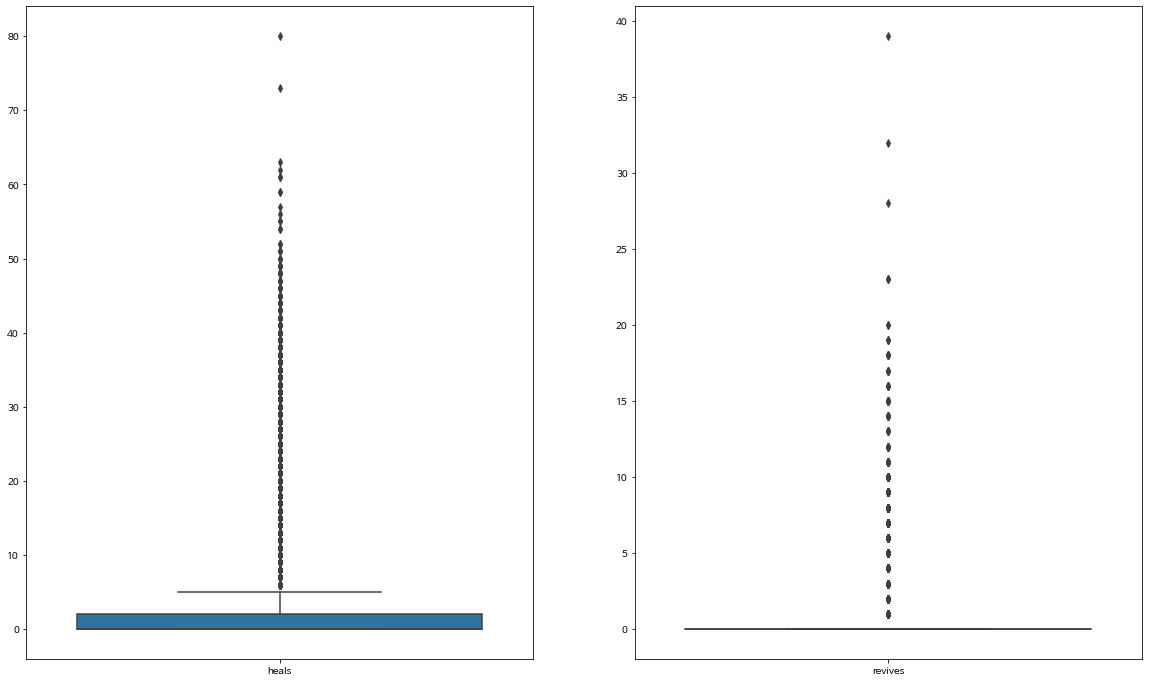

In [339]:
# boosts column 기준으로 boxplot 체크

fig = plt.figure(figsize=(20,12))

spec = grs.GridSpec(ncols=2, nrows=1)

ax01 = fig.add_subplot(spec[0])
sns.boxplot(data=train_h['heals'])
plt.xticks([0], ['heals'])

ax02 = fig.add_subplot(spec[1])
sns.boxplot(data=train_h['revives'])
plt.xticks([0], ['revives'])

plt.show()

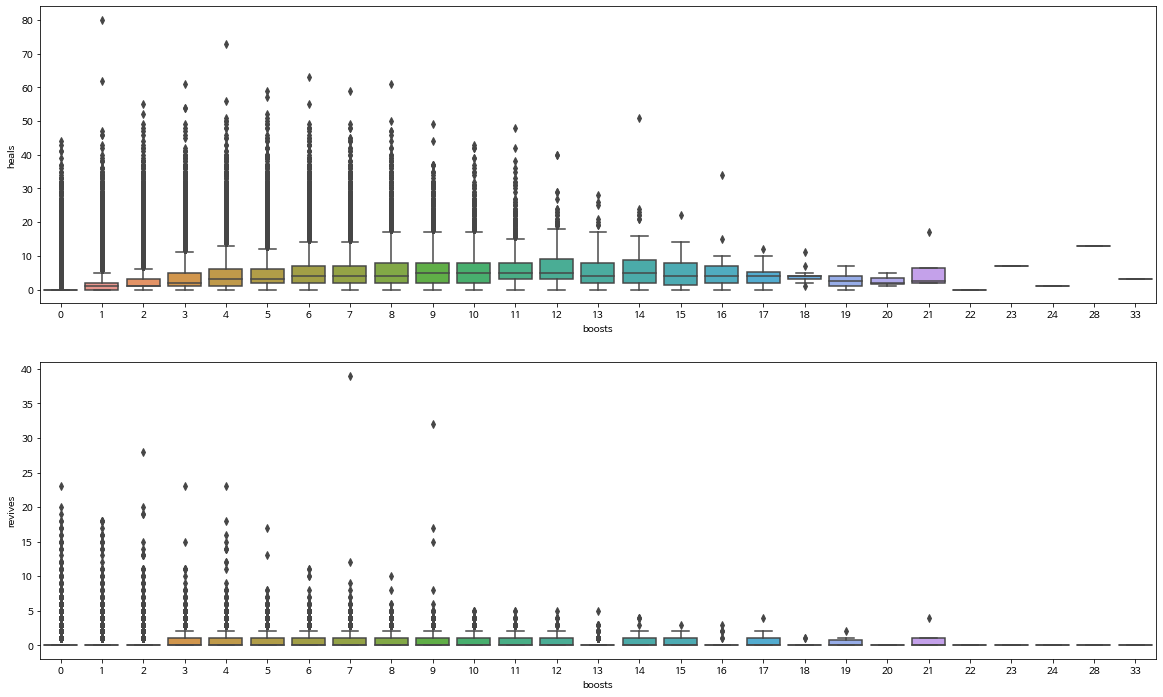

In [347]:
fig = plt.figure(figsize=(20,12))

spec = grs.GridSpec(ncols=1, nrows=2)

cols_hi = [i for i in cols_h if i != 'boosts']

for i in range(2):
    ax01 = fig.add_subplot(spec[i])
    sns.boxplot(x = 'boosts', y = train_h[cols_hi[i]], data=train_h)
    
plt.show()

#### move 관련 columns 기준

In [8]:
# 상관관계 파악
train_mv = mkdf(train_v3, cols_m)
corr_mv = train_mv.corr()
corr_mv

,walkDistance,rideDistance,swimDistance
walkDistance,1.000000,0.310936,0.167509
rideDistance,0.310936,1.000000,0.049448
swimDistance,0.167509,0.049448,1.000000


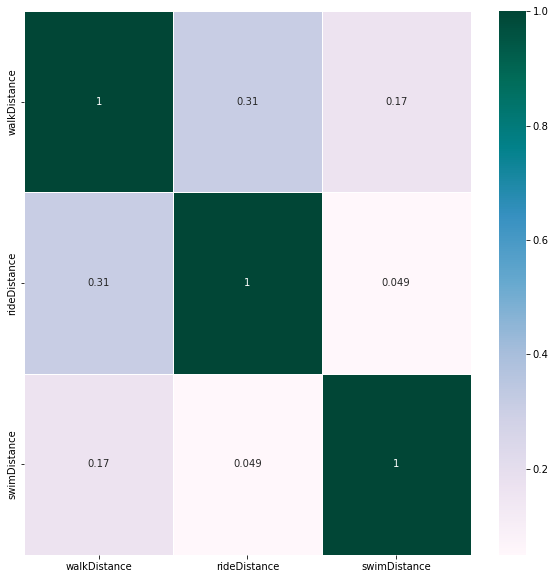

In [86]:
# 상관관계 시각화
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_m, annot=True, linewidths=1, cmap='PuBuGn')
plt.show()

In [87]:
# column 간의 VIF 지표 확인

VIF(train_mv)

,VIF Factor,features
0,1.3328,walkDistance
1,1.2807,rideDistance
2,1.0512,swimDistance


In [89]:
# column을 하나씩 제외했을 때, VIF 지표 확인

for i in cols_m:
    train_mvi = train_mv.drop(i, axis=1)
    print(f'------ VIF 확인 : {i} column 제외 ------')
    print(VIF(train_mvi))
    print(f'-------------- completed ---------------')

------ VIF 확인 : walkDistance column 제외 ------
   VIF Factor      features
0      1.0101  rideDistance
1      1.0101  swimDistance
-------------- completed ---------------
------ VIF 확인 : rideDistance column 제외 ------
   VIF Factor      features
0      1.0512  walkDistance
1      1.0512  swimDistance
-------------- completed ---------------
------ VIF 확인 : swimDistance column 제외 ------
   VIF Factor      features
0      1.2807  walkDistance
1      1.2807  rideDistance
-------------- completed ---------------


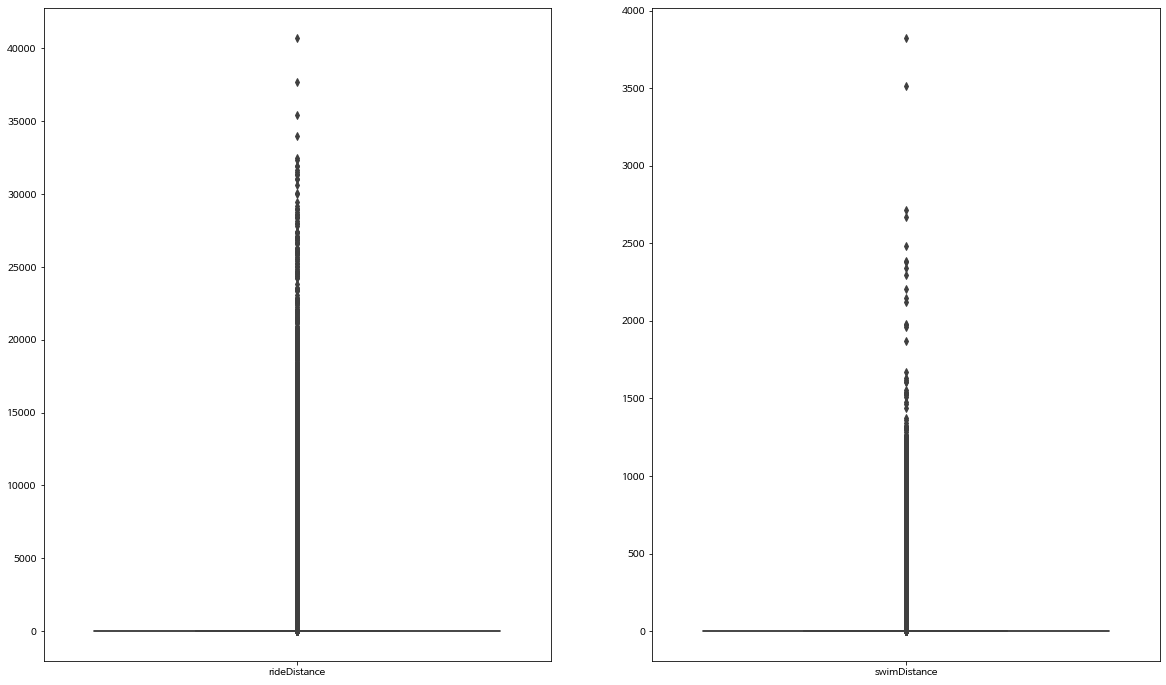

In [348]:
# walkDistance column 기준으로 boxplot 체크

fig = plt.figure(figsize=(20,12))

spec = grs.GridSpec(ncols=2, nrows=1)

ax01 = fig.add_subplot(spec[0])
sns.boxplot(data=train_mv['rideDistance'])
plt.xticks([0], ['rideDistance'])

ax02 = fig.add_subplot(spec[1])
sns.boxplot(data=train_mv['swimDistance'])
plt.xticks([0], ['swimDistance'])

plt.show()

#### machType 관련

1. 시점
> - fpp : 1인칭 모드
> - tpp : 3인칭 모드

2. Special
> - Normal
> - Casual  

3. 키워드 별 분류  
> 1) **fpp mode** : ['duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp']  
> 2) **normal mode** : ['normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp', 'normal-squad', 'normal-squad-fpp']     
> 3) **casual mode** : ['crashfpp', 'crashtpp', 'flarefpp', 'flaretpp']

In [41]:
# Type 별 분류

matchType = sorted(train['matchType'].unique())

matchType_fpp = [word for word in matchType if 'normal' not in word if 'crash' not in word if 'flare' not in word]
matchType_normal = [word for word in matchType if 'normal' in word]
matchType_casual = [word for word in matchType if word not in matchType_normal if word not in matchType_fpp]

print(f'fpp mode의 matchType은 {matchType_fpp} 입니다.')
print(f'normal mode의 matchType은 {matchType_normal} 입니다.')
print(f'casual mode의 matchType은 {matchType_casual} 입니다.')

fpp mode의 matchType은 ['duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp'] 입니다.
normal mode의 matchType은 ['normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp', 'normal-squad', 'normal-squad-fpp'] 입니다.
casual mode의 matchType은 ['crashfpp', 'crashtpp', 'flarefpp', 'flaretpp'] 입니다.


In [42]:
# cddf : 해당 column에서 특정 데이터 값을 포함하고 있는 데이터프레임만 추출

def cddf(df, column , data):        # 주의 : column명 은 작은 따옴표로 감싸줘야 함.
    cond = df[column].isin(data)
    return df[cond]

In [43]:
train_mf = cddf(train_v3, 'matchType', matchType_fpp)
train_mn = cddf(train_v3, 'matchType', matchType_normal)
train_mc = cddf(train_v3, 'matchType', matchType_casual)

print(f'fpp mode의 data 수는 {len(train_mf)} 입니다.')
print(f'normal mode의 data 수는 {len(train_mn)} 입니다.')
print(f'casual mode의 data 수는 {len(train_mc)} 입니다.')

fpp mode의 data 수는 4411698 입니다.
normal mode의 data 수는 25386 입니다.
casual mode의 data 수는 9881 입니다.


#### matchType - 인원수별 구분

- 참고 : https://namu.wiki/w/PUBG:%20BATTLEGROUNDS/%EC%9D%B4%EB%B2%A4%ED%8A%B8%20%EB%AA%A8%EB%93%9C
    - 대난투 격돌 (Crash Carnage) : 2인 듀오로 에란겔에서 최대 100명의 플레이어가 경기에 참여

1. 게임에 참여한 인원수별 구분  
> - 1인전 : solo  
> - 2인전 : duo or crash  
> - 4인전 : squad  
    
2. 데이터별 분류 : matchType에 포함된 키워드를 이용하여 구분  
> 1) **1인전** : 데이터에 'solo' 포함  
> 2) **2인전** : 데이터에 'duo' 혹은 'crash' 포함  
> 3) **4인전** : 데이터에 'squad' 포함  

In [44]:
matchType_solo = [word for word in matchType if 'solo' in word]
matchType_duo = [word for word in matchType if 'duo' in word]
matchType_squad = [word for word in matchType if word not in matchType_solo if word not in matchType_duo]

print(f'solo mode의 matchType은 {matchType_solo} 입니다.')
print(f'duo mode의 matchType은 {matchType_duo} 입니다.')
print(f'squad mode의 matchType은 {matchType_squad} 입니다.')

solo mode의 matchType은 ['normal-solo', 'normal-solo-fpp', 'solo', 'solo-fpp'] 입니다.
duo mode의 matchType은 ['duo', 'duo-fpp', 'normal-duo', 'normal-duo-fpp'] 입니다.
squad mode의 matchType은 ['crashfpp', 'crashtpp', 'flarefpp', 'flaretpp', 'normal-squad', 'normal-squad-fpp', 'squad', 'squad-fpp'] 입니다.


In [45]:
def mt(x):
    if 'solo' in x :
        return 1        # 1 : solo
    elif 'duo' in x or 'crash' in x :
        return 2        # 2 : duo
    else :
        return 4      # 4 : squad

    
def dfng(df, func):
    df['matchType'] = df['matchType'].map(func)
    df

In [46]:
train_mt = train_v3.copy()

dfng(train_mt, mt)

table_mt = train_mt['matchType'].value_counts()

index = table_mt.index
data = table_mt.values

df_byMT = pd.DataFrame(data, index = index, columns = ['matchType'])
df_byMT['TypePerc'] = df_byMT['matchType'] / df_byMT['matchType'].sum() * 100
df_byMT = df_byMT.sort_index()
df_byMT

,matchType,TypePerc
1,720712,16.206829
2,1322628,29.742262
4,2403625,54.050909


In [172]:
# 위의 함수를 lamda 함수로 축약 시,
# match = lambda x: 'solo' if 'solo' in x else 'duo' if 'duo' in x or 'crash' in x else 'squad'

# train_mt = train.copy()
# train_mt['matchType'] = train_mt[]'matchType'].apply(match)
# train_mt['matchType'].value_counts()

squad    2403625
duo      1322628
solo      720712
Name: matchType, dtype: int64

In [19]:
train_mt['matchType']

0          4
1          4
2          2
3          4
4          1
          ..
4446961    4
4446962    1
4446963    4
4446964    4
4446965    1
Name: matchType, Length: 4446965, dtype: int64

============================================================ ASSISTS ============================================================



<Figure size 432x288 with 0 Axes>

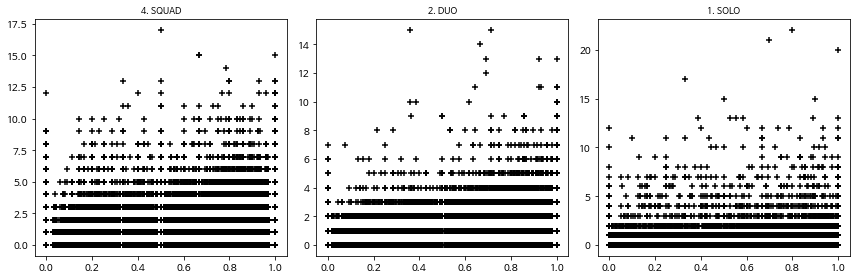

============================================================ BOOSTS ============================================================



<Figure size 432x288 with 0 Axes>

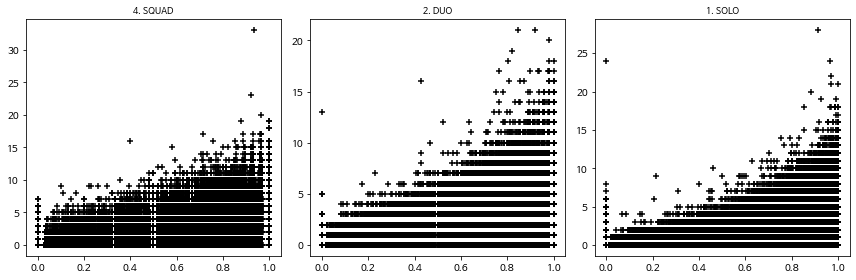

============================================================ DAMAGEDEALT ============================================================



<Figure size 432x288 with 0 Axes>

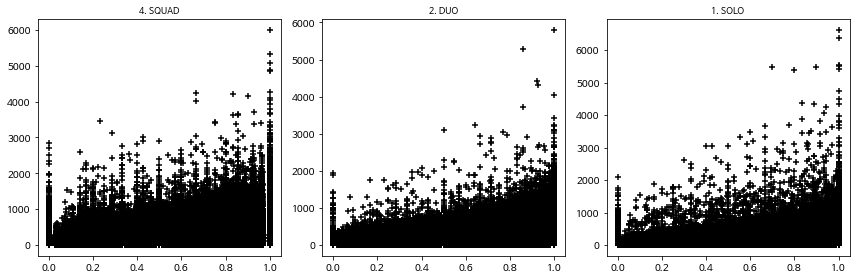

============================================================ DBNOS ============================================================



C:\Users\brown\AppData\Local\Temp\ipykernel_16956\4188571669.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


<Figure size 432x288 with 0 Axes>

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


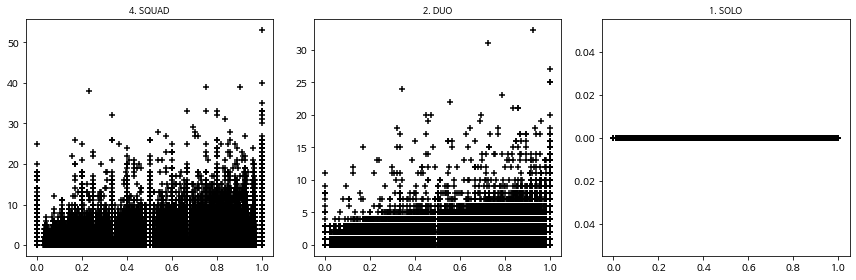

============================================================ HEADSHOTKILLS ============================================================



<Figure size 432x288 with 0 Axes>

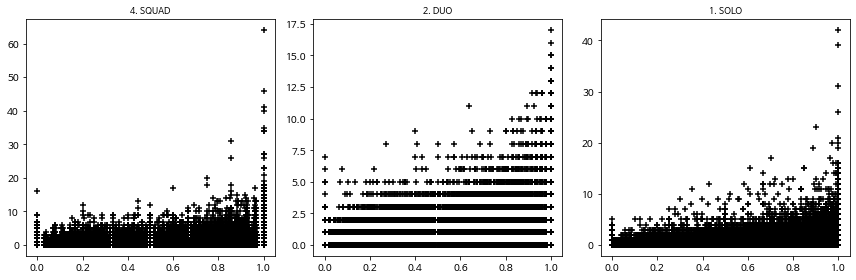

============================================================ HEALS ============================================================



<Figure size 432x288 with 0 Axes>

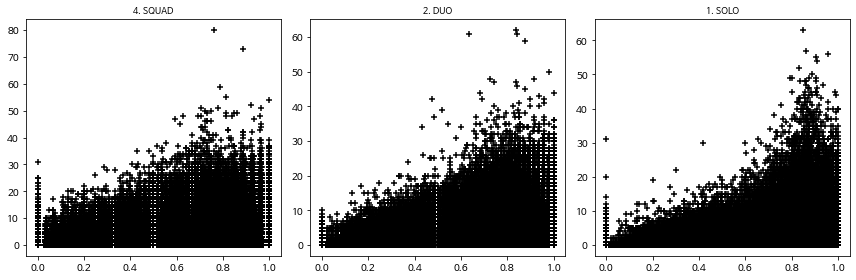

============================================================ KILLPLACE ============================================================



<Figure size 432x288 with 0 Axes>

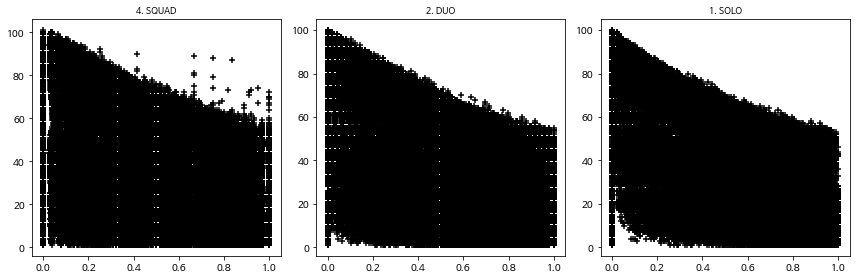

============================================================ KILLPOINTS ============================================================



<Figure size 432x288 with 0 Axes>

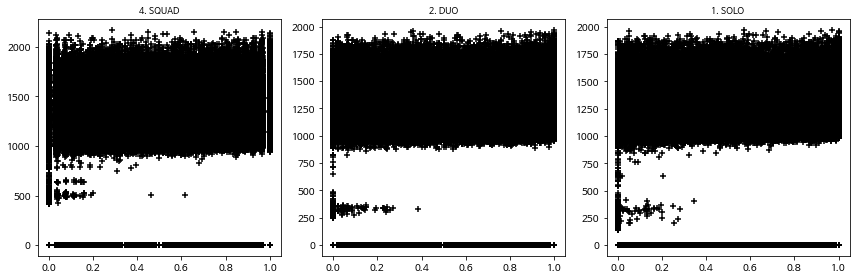

============================================================ KILLS ============================================================



<Figure size 432x288 with 0 Axes>

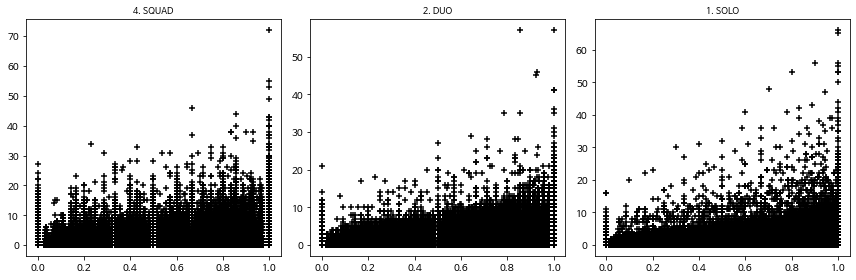

============================================================ KILLSTREAKS ============================================================



<Figure size 432x288 with 0 Axes>

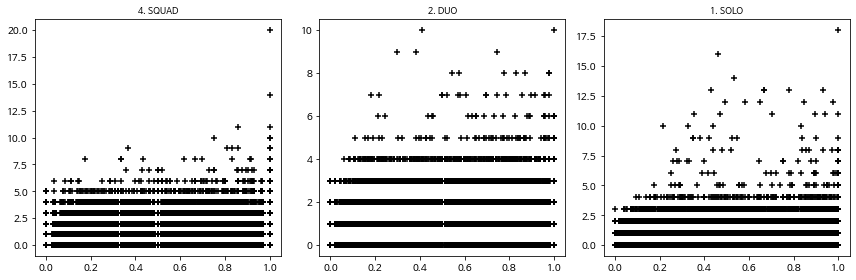

============================================================ LONGESTKILL ============================================================



<Figure size 432x288 with 0 Axes>

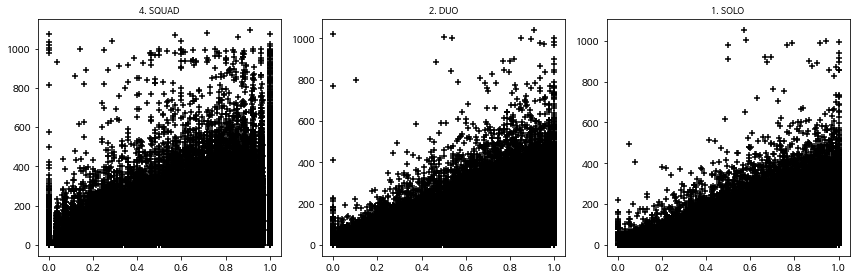

============================================================ MATCHDURATION ============================================================



<Figure size 432x288 with 0 Axes>

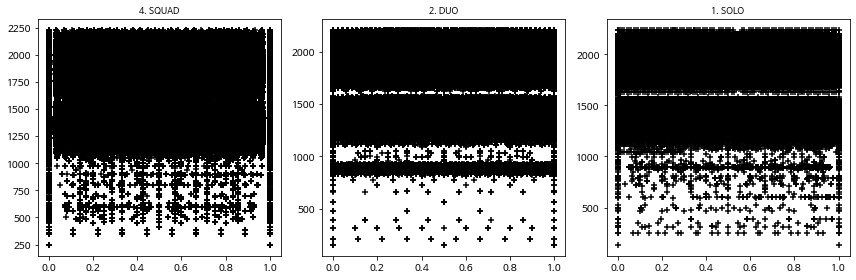

============================================================ MAXPLACE ============================================================



<Figure size 432x288 with 0 Axes>

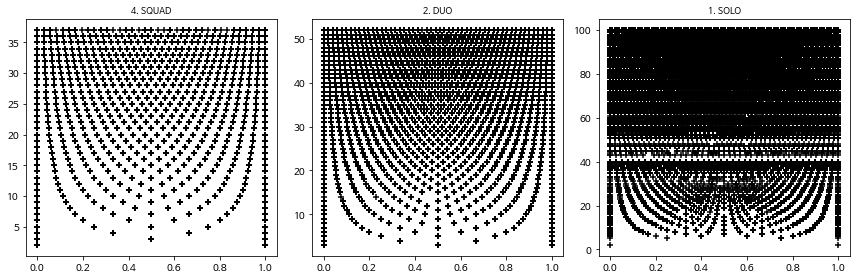

============================================================ NUMGROUPS ============================================================



<Figure size 432x288 with 0 Axes>

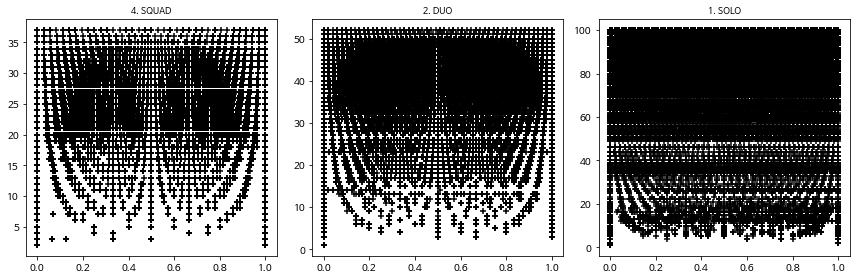

============================================================ RANKPOINTS ============================================================



<Figure size 432x288 with 0 Axes>

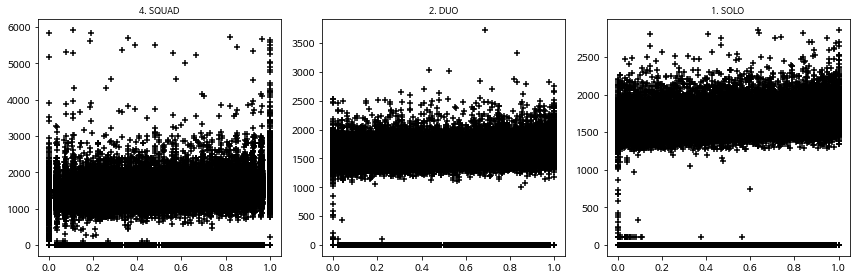

============================================================ REVIVES ============================================================



<Figure size 432x288 with 0 Axes>

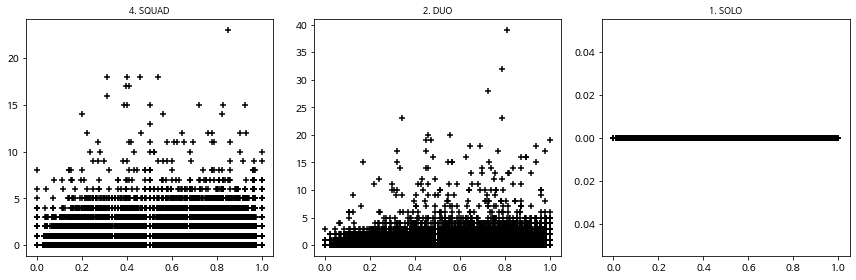

============================================================ RIDEDISTANCE ============================================================



<Figure size 432x288 with 0 Axes>

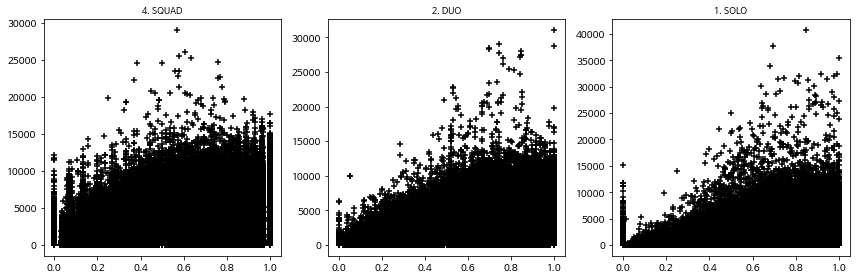

============================================================ ROADKILLS ============================================================



<Figure size 432x288 with 0 Axes>

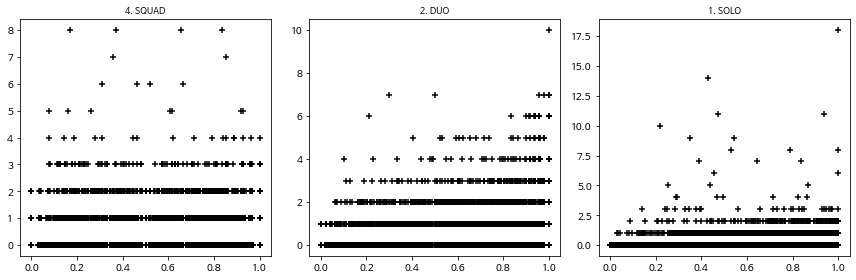

============================================================ SWIMDISTANCE ============================================================



<Figure size 432x288 with 0 Axes>

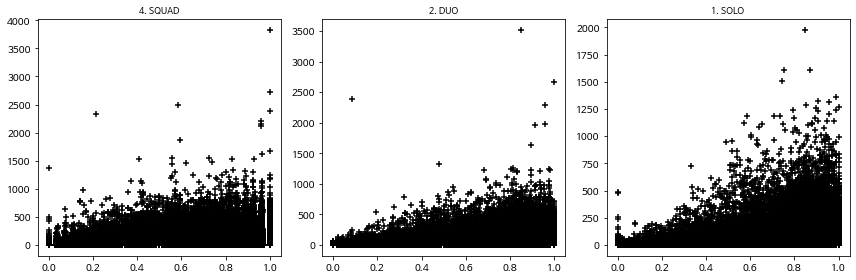

============================================================ TEAMKILLS ============================================================



<Figure size 432x288 with 0 Axes>

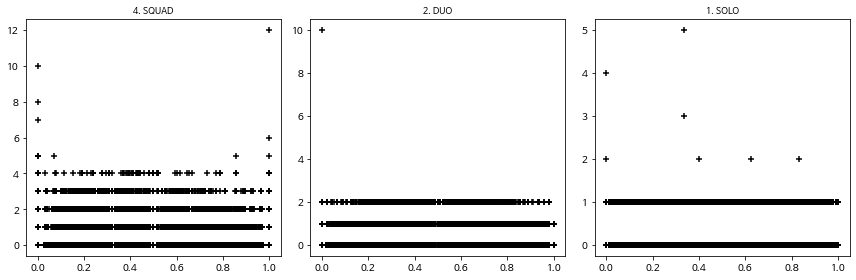

============================================================ VEHICLEDESTROYS ============================================================



<Figure size 432x288 with 0 Axes>

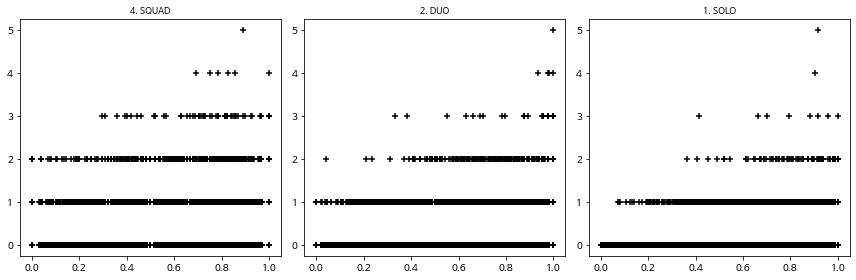

============================================================ WALKDISTANCE ============================================================



<Figure size 432x288 with 0 Axes>

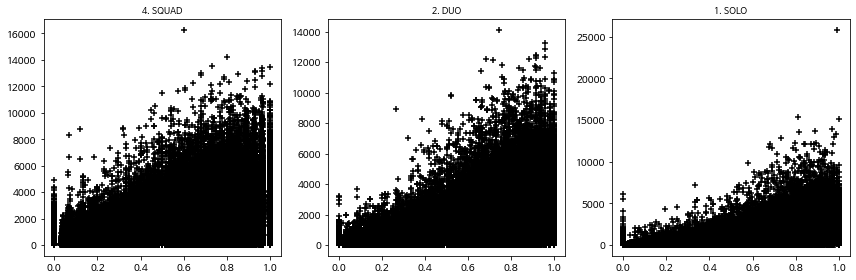

============================================================ WEAPONSACQUIRED ============================================================



<Figure size 432x288 with 0 Axes>

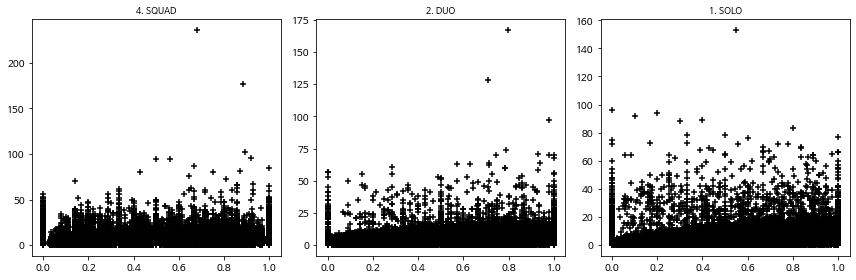

============================================================ WINPOINTS ============================================================



<Figure size 432x288 with 0 Axes>

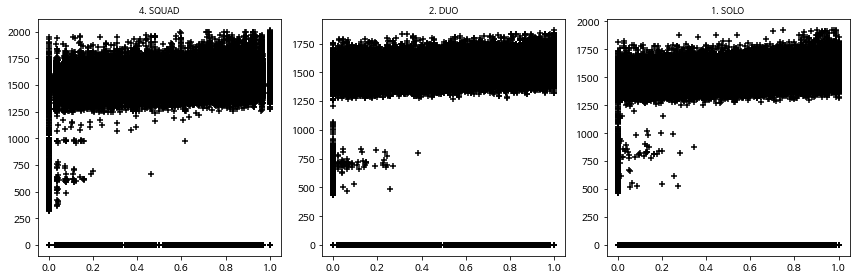

In [333]:
for i in num_columns:
    print("="*60+" {} ".format(i).upper()+"="*60+"\n")
    plt.figure()
    fig, ax = plt.subplots(1,3,figsize=(12,4)) #(nrow, ncol)

    for j, mt in enumerate(train_mt['matchType'].unique()):
        plt.subplot(1,3,j+1)
        plt.scatter(train_mt[train_mt['matchType']==mt]['winPlacePerc'], train_mt[train_mt['matchType']==mt][i], marker='+', c='black')
        plt.title(mt.upper(), fontsize=9)
        plt.tight_layout()

    plt.show();

#### numGroup 관련

1. 게임에 참여한 인원수별 구분
    - 1인전 : solo
    - 2인전 : duo
    - 4인전 : squad
    
2. 구분 기준 
    - numGroups : 경기에서 데이터가 있는 그룹의 수입니다.
    - matchType의 경우, 키워드로 구분하고자 하였으나 이벤트 전이 존재하기 때문에 numGroup으로 구분

2. 데이터별 분류  
    1) **1인전** : numGroups의 수가 50 초과  
    2) **2인전** : numGroups의 수가 25 초과 50 이하  
    3) **4인전** : numGroups의 수가 25 이하  

In [20]:
# numGroups의 개수를 기준으로 게임 종류 구분

def ng(x):
    if x <= 25 :
        return 4       # 4 : squad
    elif x <= 50 :
        return 2       # 2 : duo
    else :
        return 1       # 1 : solo
    
def dfng(df, func):
    df['numGroups'] = df['numGroups'].map(func)
    df

In [21]:
train_n = train_v3.copy()

dfng(train_n, ng)
train_n['numGroups'].value_counts()

table_n = train_n['numGroups'].value_counts()

index = table_n.index
data = table_n.values

df_byNG = pd.DataFrame(data, index = index, columns = ['numGroups'])
df_byNG['TypePerc'] = df_byNG['numGroups'] / df_byNG['numGroups'].sum() * 100
df_byNG = df_byNG.sort_index()
df_byNG 

,numGroups,TypePerc
1,709111,15.945954
2,3295326,74.102809
4,442528,9.951236


In [22]:
train_n['numGroups']

0          2
1          4
2          2
3          2
4          1
          ..
4446961    2
4446962    1
4446963    2
4446964    4
4446965    1
Name: numGroups, Length: 4446965, dtype: int64

============================================================ ASSISTS ============================================================



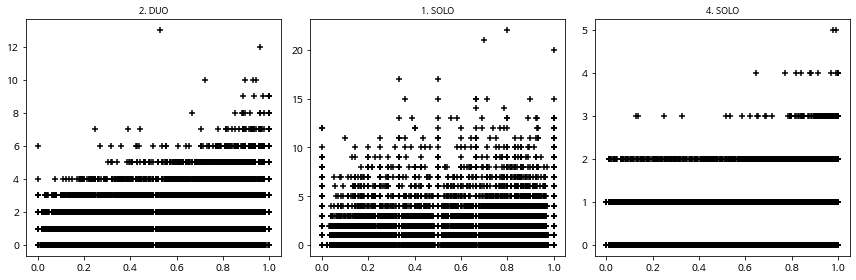

============================================================ BOOSTS ============================================================



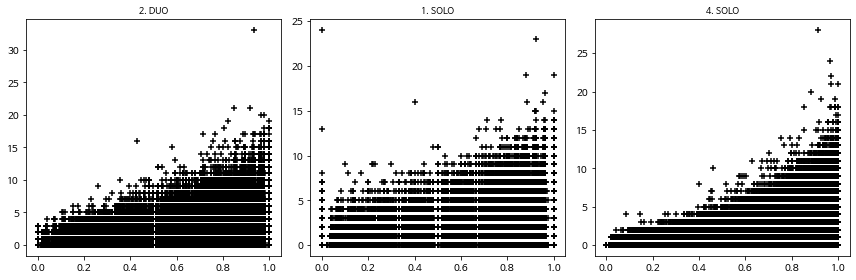

============================================================ DAMAGEDEALT ============================================================



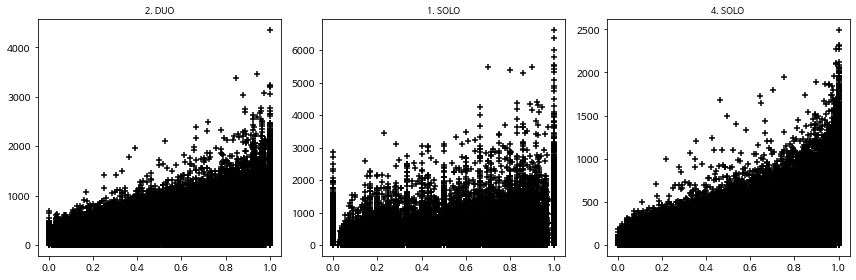

============================================================ DBNOS ============================================================



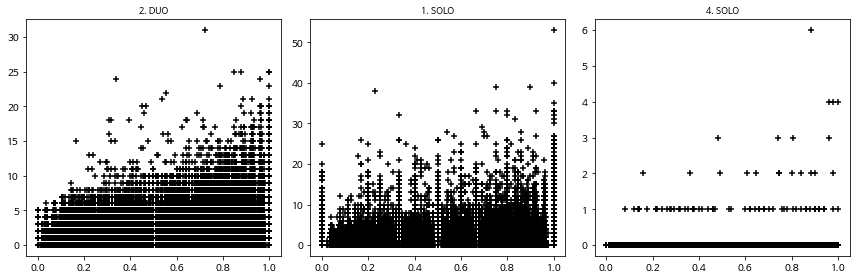

============================================================ HEADSHOTKILLS ============================================================



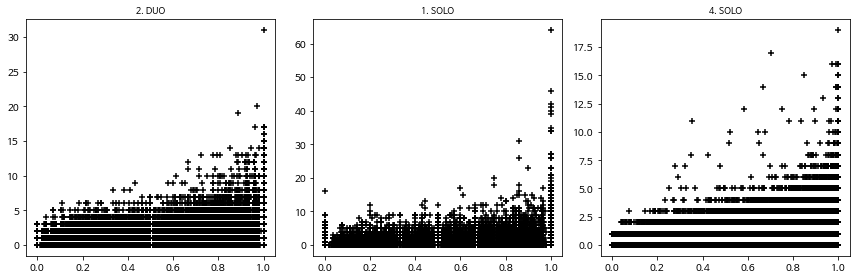

============================================================ HEALS ============================================================



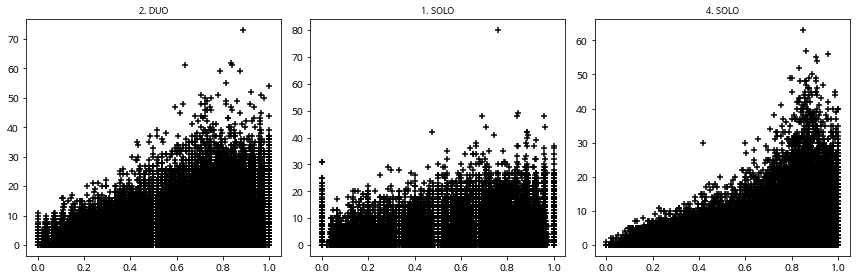

============================================================ KILLPLACE ============================================================



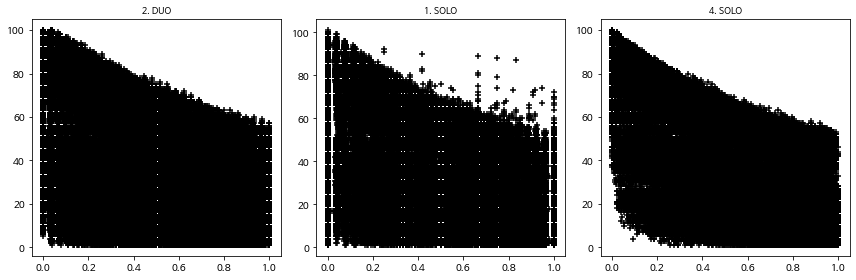

============================================================ KILLPOINTS ============================================================



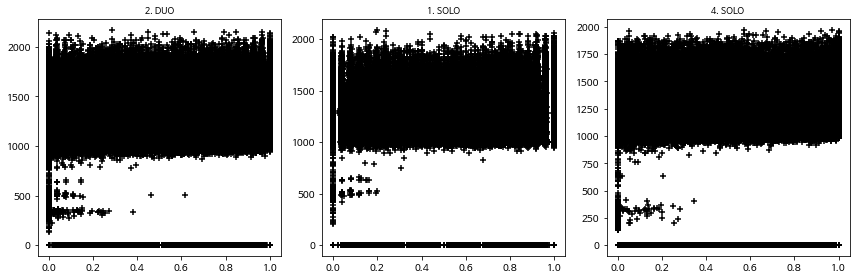

============================================================ KILLS ============================================================



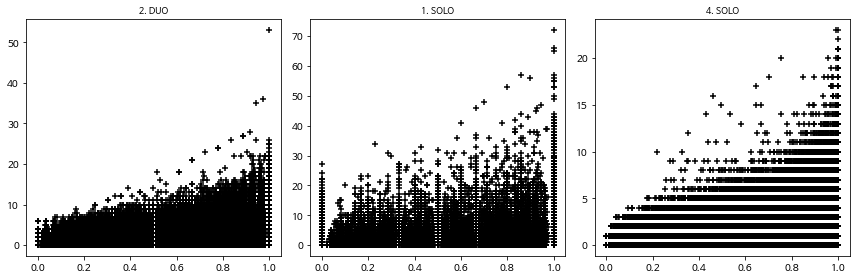

============================================================ KILLSTREAKS ============================================================



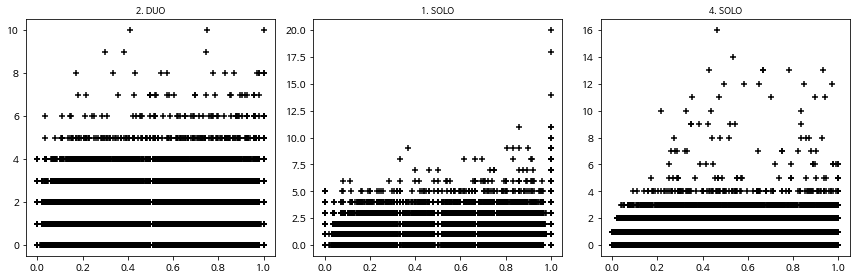

============================================================ LONGESTKILL ============================================================



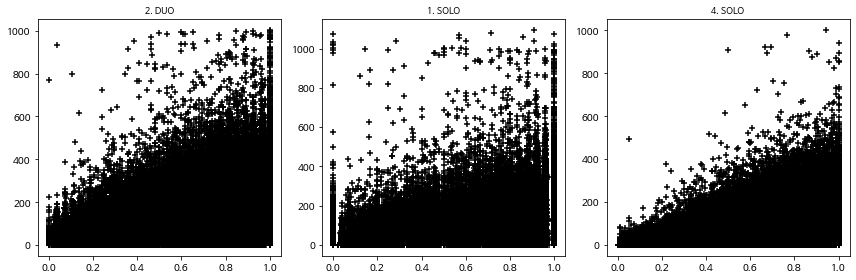

============================================================ MATCHDURATION ============================================================



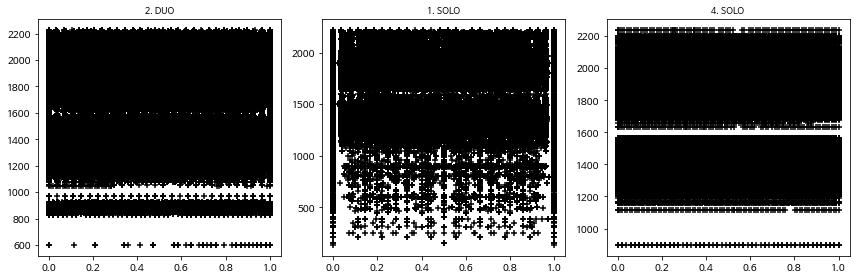

============================================================ MAXPLACE ============================================================



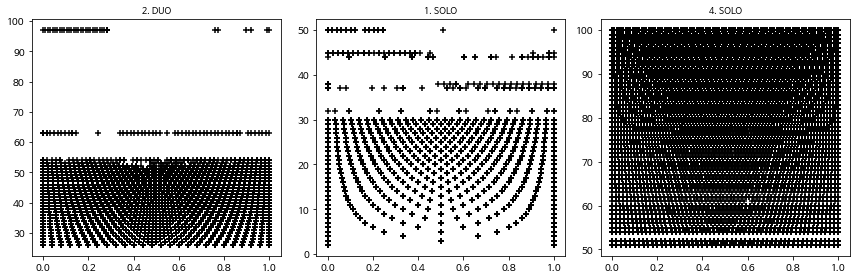

============================================================ NUMGROUPS ============================================================



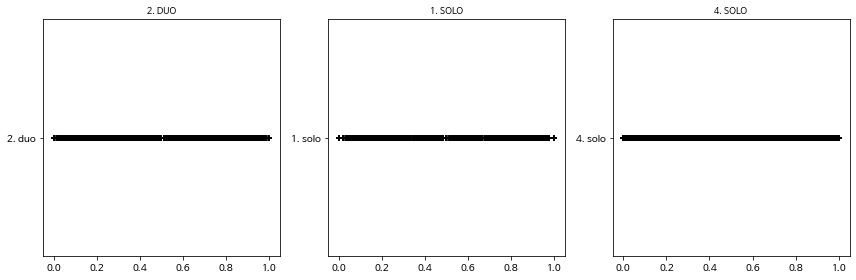

============================================================ RANKPOINTS ============================================================



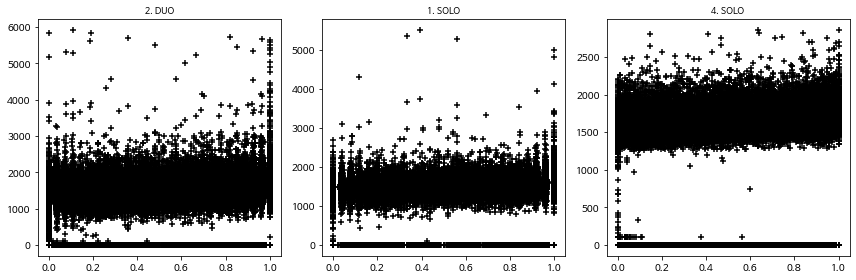

============================================================ REVIVES ============================================================



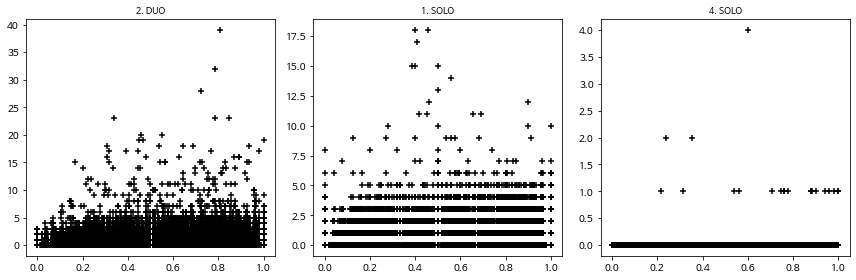

============================================================ RIDEDISTANCE ============================================================



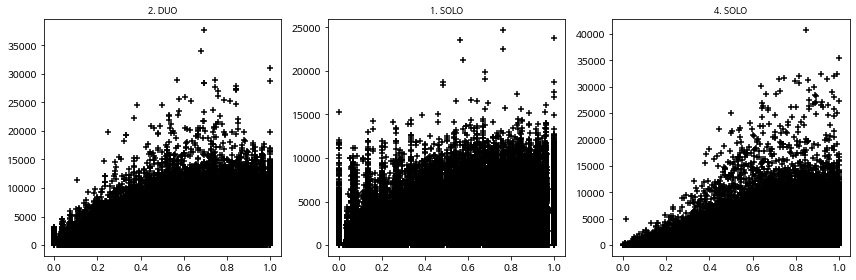

============================================================ ROADKILLS ============================================================



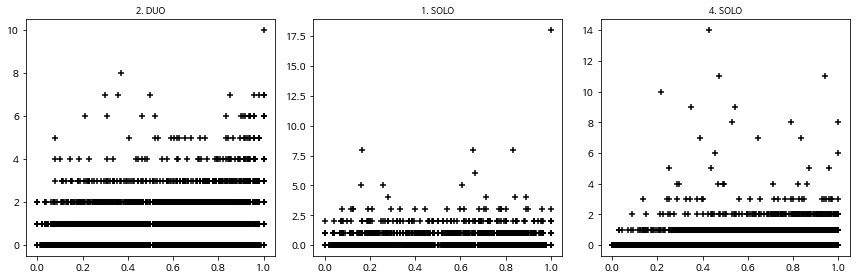

============================================================ SWIMDISTANCE ============================================================



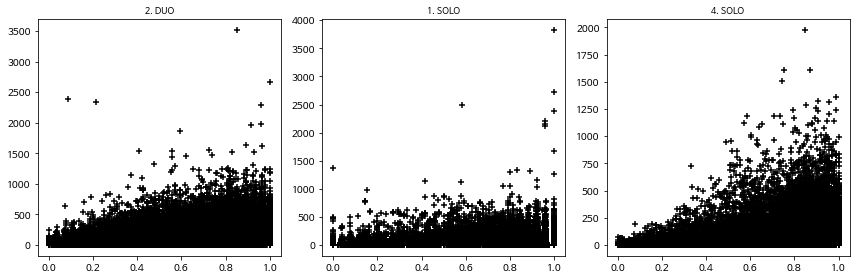

============================================================ TEAMKILLS ============================================================



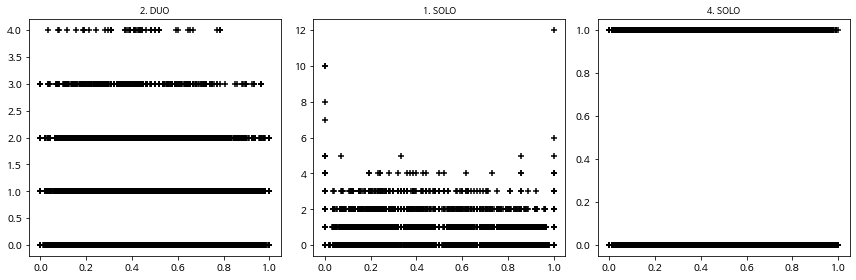

============================================================ VEHICLEDESTROYS ============================================================



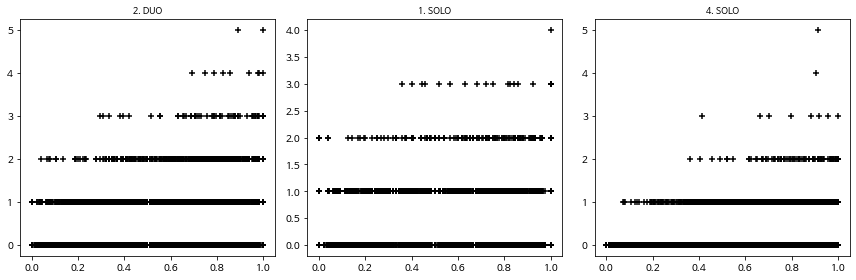

============================================================ WALKDISTANCE ============================================================



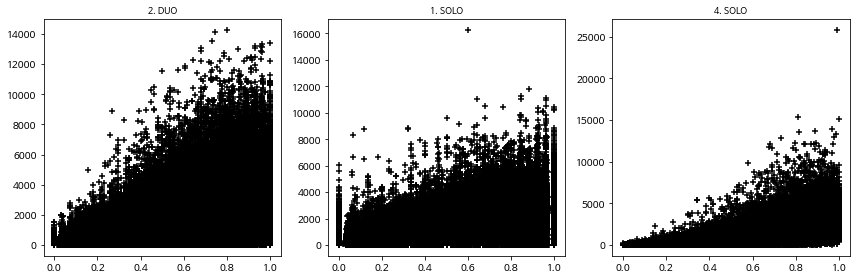

============================================================ WEAPONSACQUIRED ============================================================



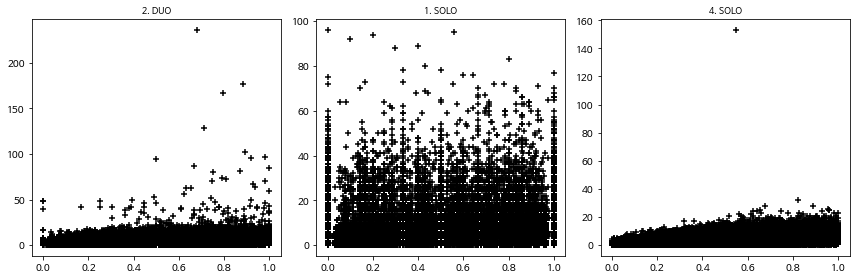

============================================================ WINPOINTS ============================================================



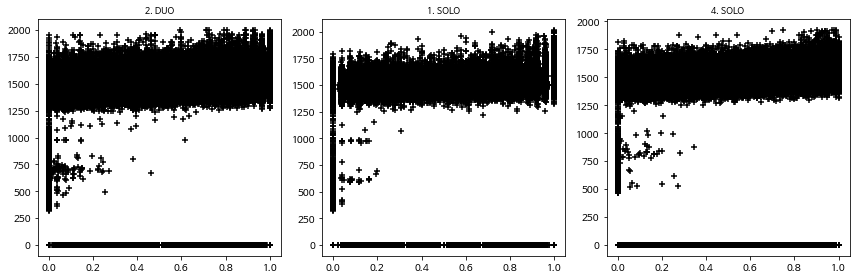

In [20]:
for i in num_columns:
    print("="*60+" {} ".format(i).upper()+"="*60+"\n")
    fig, ax = plt.subplots(1,3,figsize=(12,4)) #(nrow, ncol)

    for j, mt in enumerate(train_n['numGroups'].unique()):
        plt.subplot(1,3,j+1)
        plt.scatter(train_n[train_n['numGroups']==mt]['winPlacePerc'], train_n[train_n['numGroups']==mt][i], marker='+', c='black')
        plt.title(mt.upper(), fontsize=9)
        plt.tight_layout()

    plt.show();

#### groupId 관련

- matchId의 값이 같은 경우 : 동일 게임에 참여한 것을 의미
- groupId의 값이 같은 경우 : 동맹으로 게임에 참여한 것을 의미

In [23]:
train_v3.groupId.value_counts()

14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026744, dtype: int64

In [24]:
train_v3[train_v3['groupId'] == '14d6b54cdec6bc']['matchId']

51361      b30f3d87189aa6
87328      b30f3d87189aa6
130067     b30f3d87189aa6
205499     b30f3d87189aa6
214626     b30f3d87189aa6
                ...      
4110904    b30f3d87189aa6
4173293    b30f3d87189aa6
4179298    b30f3d87189aa6
4352240    b30f3d87189aa6
4444523    b30f3d87189aa6
Name: matchId, Length: 74, dtype: object

In [25]:
train_v3[train_v3['matchId'] == 'b30f3d87189aa6']['groupId'].value_counts()

14d6b54cdec6bc    74
0aef53445f8793    15
Name: groupId, dtype: int64

- 한 게임 내에는 최대 4명까지 동맹이 가능하나, 어떤 이유에서인지 동일한 groupId를 갖는 데이터가 74개나 존재.

In [23]:
# 동일 groupId를 갖는 데이터들에 대해 해당 groupId의 개수를 새로운 column의 값으로 데이터프레임에 추가

train_g = train_v3.copy()
train_g['groupcnt']=train_g .groupby('groupId').groupId.transform('count')
train_g

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,groupcnt
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,5
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,1
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,3
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,4


In [24]:
# groupId의 value 값을 기준으로 게임 종류 구분

def gi(x):
    if x == 1 :
        return 1       # 1 : solo
    elif x == 2 :
        return 2       # 2 : duo
    else :
        return 4       # 4 : squad
    
def dfgi(df, func):
    df['groupcnt'] = df['groupcnt'].map(func)
    df

In [25]:
dfgi(train_g, gi)

table_g = train_g['groupcnt'].value_counts()

index = table_g.index
data = table_g.values

df_byGI = pd.DataFrame(data, index = index, columns = ['groupcnt'])
df_byGI['TypePerc'] = df_byGI['groupcnt'] / df_byGI['groupcnt'].sum() * 100
df_byGI = df_byGI.sort_index()
df_byGI

,groupcnt,TypePerc
1,792276,17.816106
2,1308422,29.422809
4,2346267,52.761085


In [26]:
train_g['groupcnt']

0          4
1          4
2          2
3          1
4          1
          ..
4446961    4
4446962    1
4446963    4
4446964    4
4446965    1
Name: groupcnt, Length: 4446965, dtype: int64

============================================================ ASSISTS ============================================================



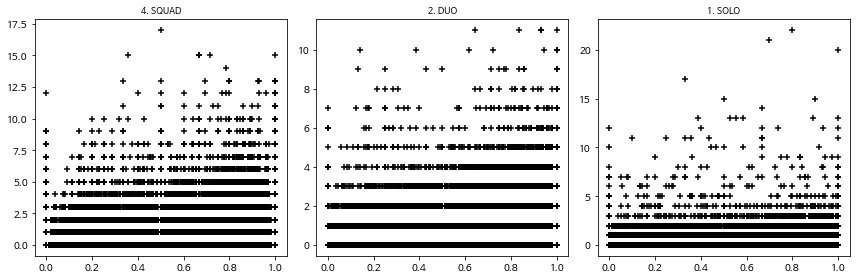

============================================================ BOOSTS ============================================================



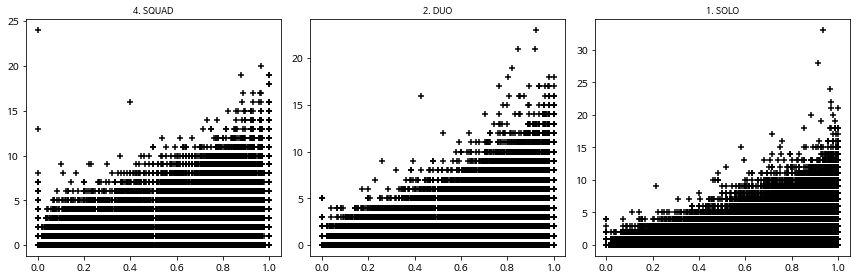

============================================================ DAMAGEDEALT ============================================================



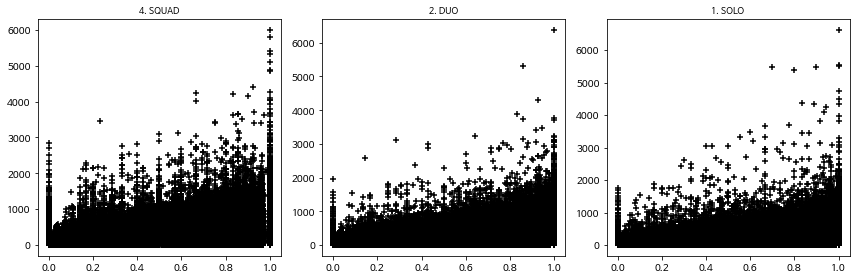

============================================================ DBNOS ============================================================



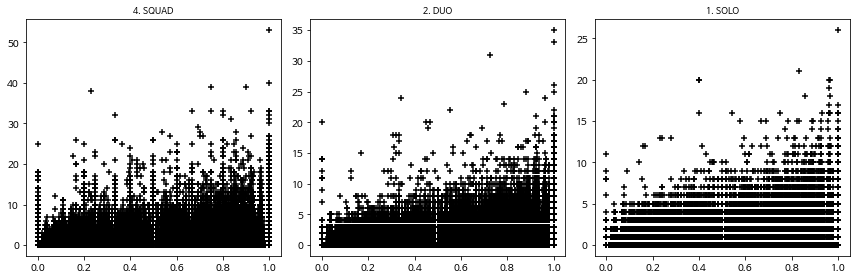

============================================================ HEADSHOTKILLS ============================================================



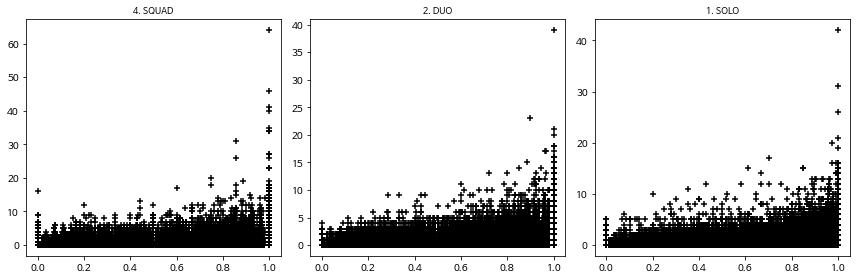

============================================================ HEALS ============================================================



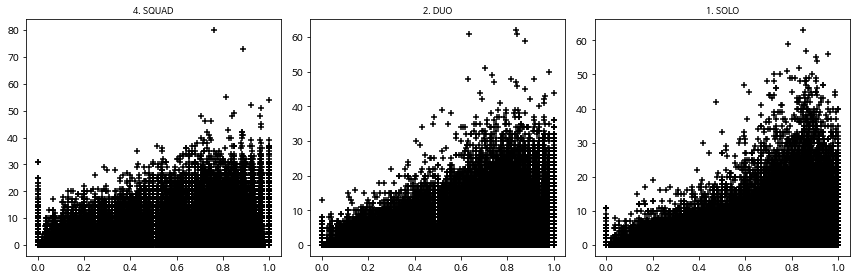

============================================================ KILLPLACE ============================================================



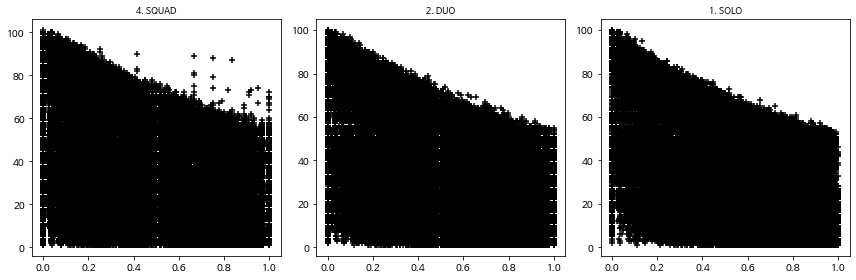

============================================================ KILLPOINTS ============================================================



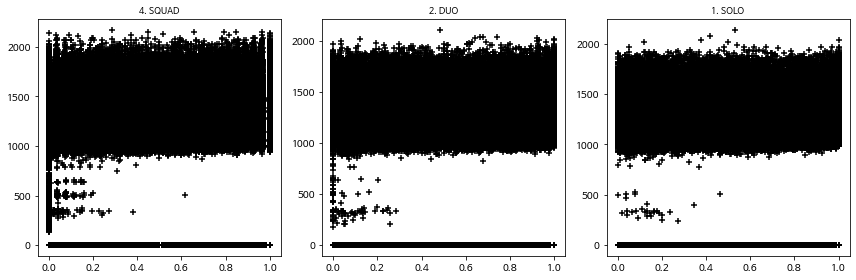

============================================================ KILLS ============================================================



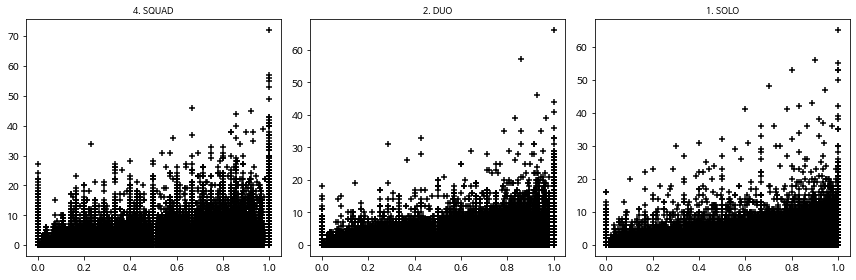

============================================================ KILLSTREAKS ============================================================



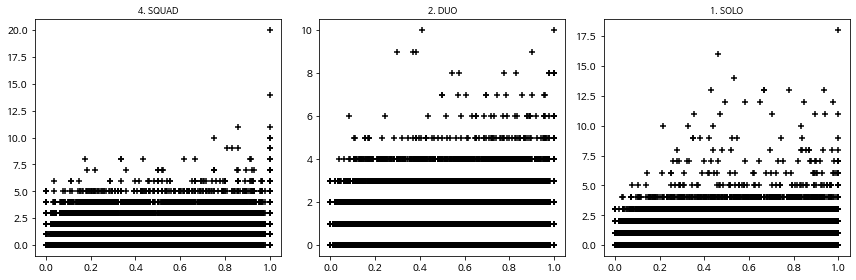

============================================================ LONGESTKILL ============================================================



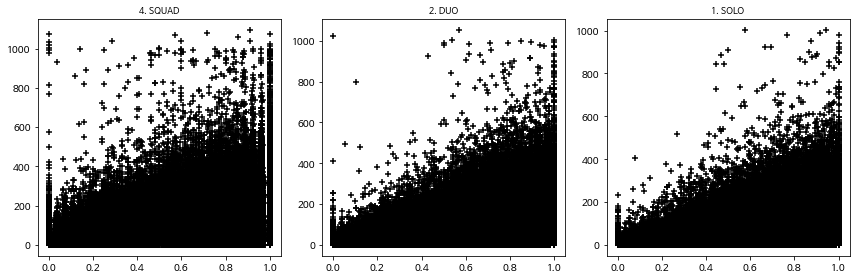

============================================================ MATCHDURATION ============================================================



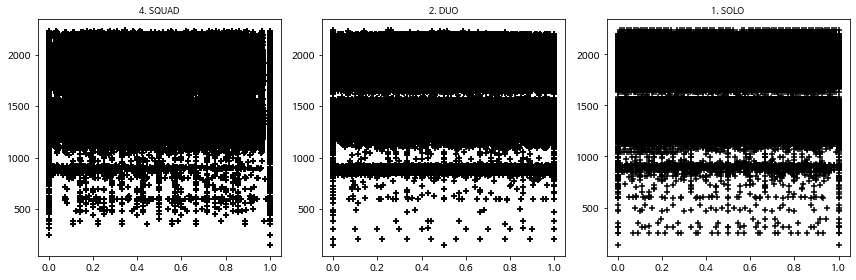

============================================================ MAXPLACE ============================================================



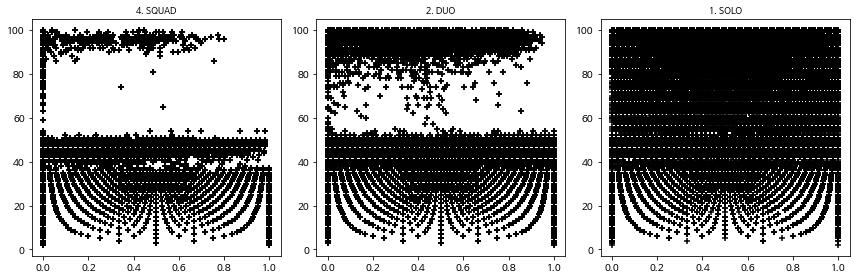

============================================================ NUMGROUPS ============================================================



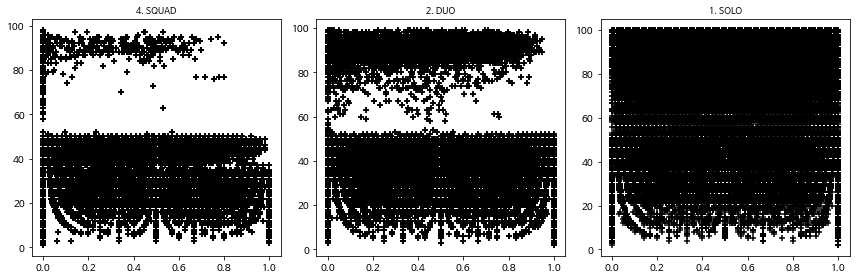

============================================================ RANKPOINTS ============================================================



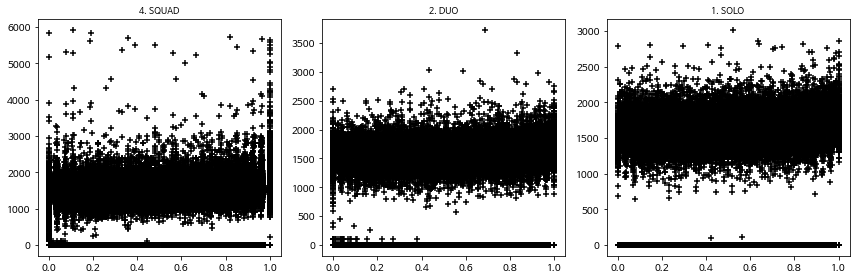

============================================================ REVIVES ============================================================



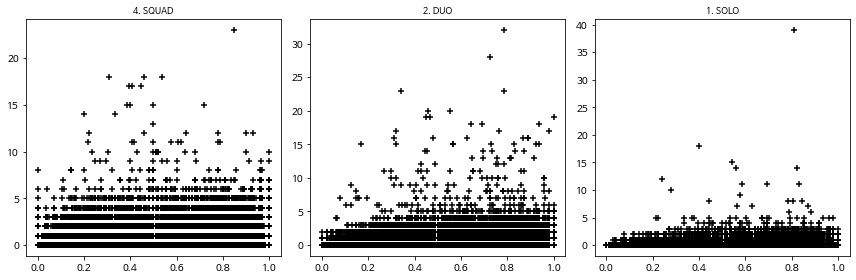

============================================================ RIDEDISTANCE ============================================================



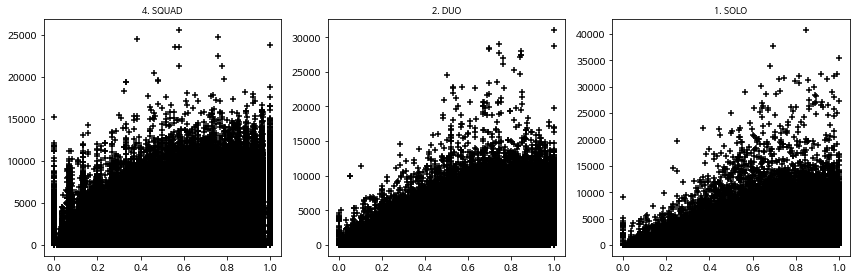

============================================================ ROADKILLS ============================================================



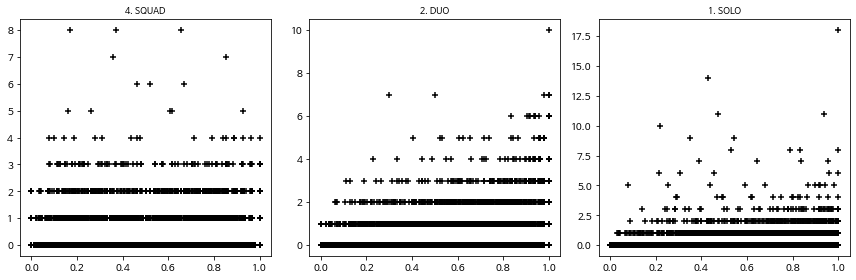

============================================================ SWIMDISTANCE ============================================================



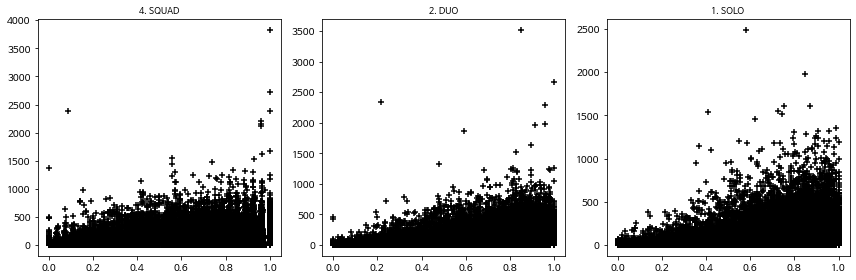

============================================================ TEAMKILLS ============================================================



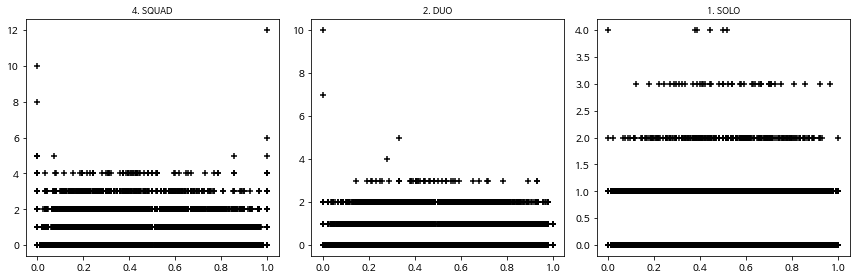

============================================================ VEHICLEDESTROYS ============================================================



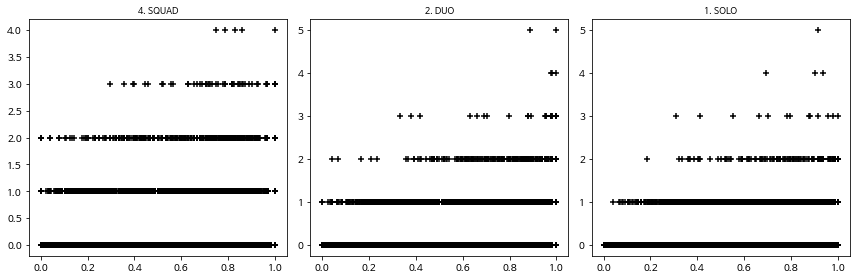

============================================================ WALKDISTANCE ============================================================



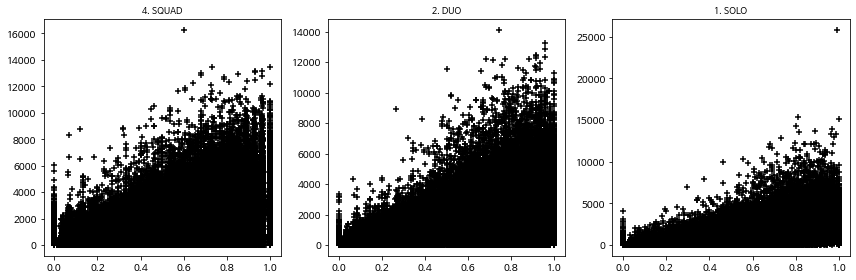

============================================================ WEAPONSACQUIRED ============================================================



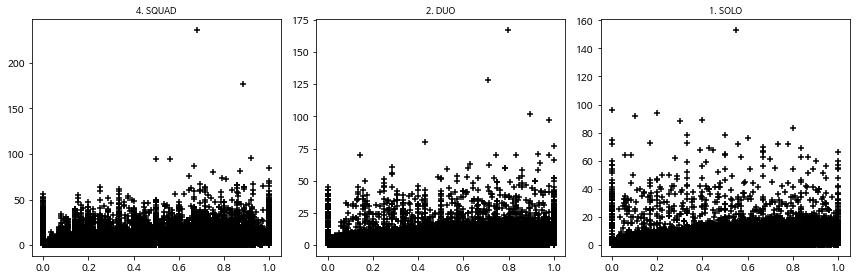

============================================================ WINPOINTS ============================================================



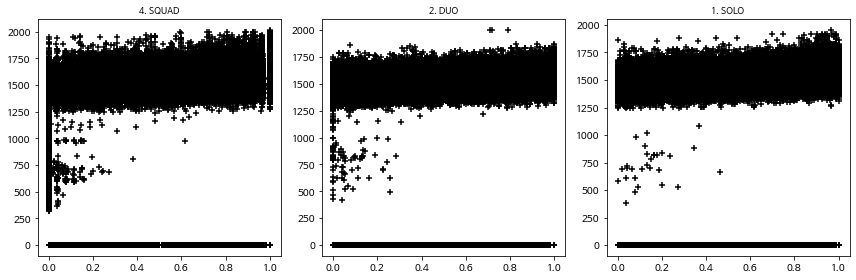

In [23]:
for i in num_columns:
    print("="*60+" {} ".format(i).upper()+"="*60+"\n")
    fig, ax = plt.subplots(1,3,figsize=(12,4)) #(nrow, ncol)

    for j, mt in enumerate(train_g['groupcnt'].unique()):
        plt.subplot(1,3,j+1)
        plt.scatter(train_g[train_g['groupcnt']==mt]['winPlacePerc'], train_g[train_g['groupcnt']==mt][i], marker='+', c='black')
        plt.title(mt.upper(), fontsize=9)
        plt.tight_layout()

    plt.show();

## 피처 엔지니어링 및 모델링

1. kill 관련 columns   
    > 01) assists                 :  0.2994  
    > 02) damageDealt             :  0.4405  
    > 03) DBNOs                   :  0.2800  
    > 04) headshotKills           :  0.2777  
    > 05) killPlace               : -0.7191  
    > 06) kills                   :  0.4199  
    > 07) killStreaks             :  0.3766  
    > 08) longestKill             :  0.4102  
    > 09) roadKills               :  0.0345  
    > 10) teamKills               :  0.0159  
    > 11) weaponsAcquired         :  0.5838  

2. heal 관련 columns  
    > 1) boosts                   :  0.6342  
    > 2) heals                    :  0.4279  
    > 3) revives                  :  0.2409  
    
3. move 관련 columns  
    > 1) walkDistance             :  0.8109  
    > 2) rideDistance             :  0.3429  
    > 3) swimDistance             :  0.1496  
    
4. 기타 columns  
    > 01) killPoints              :  0.0129  
    > 02) matchDuration           : -0.0052  
    > 03) maxPlace                :  0.0374  
    > 04) numGroups               :  0.0396  
    > 05) rankPoints              :  0.0135  
    > 06) vehickeDestroys         :  0.0734  
    > 07) winPoints               :  0.0071  

### 1차

※ 사용할 column 선택

1. 'kills' 관련 columns 관련
>    - target과의 상관계수는 높지 않음  
>    - 그러나, damageDealt, killStreaks, DBNOs, headshotKills, longestKill과의 상관계수가 높은 편에 속하기 때문에 컬럼 제거  
>    - 또한, kill 관련 columns와의 VIF 수치가 10 근처 혹은 이상이기에 제외해야 한다고 판단.
>    - objective columns 삭제

2. 'heals' 관련 columns 관련
>    - 특이점이 없다 판단하여 모두 사용

3. 'ride' 관련 columns 관련
>    - 특이점이 없다 판단하여 모두 사용

4. 기타 columns 관련
>    - target과의 상관계수가 매우 낮으며, VIF Factor 수치가 높은 편이기 때문에 모두 제거
>    - killPoints, matchDuration, matchDuration, maxPlace, numGroups, rankPoints, vehickeDestroys, winPoints

5. object columns 관련
>    - objective columns의 경우, 1차 에서는 모두 제거 후 학습 진행

In [70]:
#전체 columns
'''
▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object') 
    → 총 24개의 column
▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 column
'''

"\n▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',\n       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',\n       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',\n       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',\n       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],\n      dtype='object') \n    → 총 24개의 column\n▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 column\n"

In [14]:
col_u03 = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killStreaks', 'longestKill', \
           'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'walkDistance', 'weaponsAcquired']

train_c03 = mkdf(train_v3, col_u03)
train_c03

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killStreaks,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired
0,0,0,0.00,0,0,0,60,0,0.00,0,0.0000,0,0.000,0,244.80,1
1,0,0,91.47,0,0,0,57,0,0.00,0,0.0045,0,11.040,0,1434.00,5
2,1,0,68.00,0,0,0,47,0,0.00,0,0.0000,0,0.000,0,161.80,2
3,0,0,32.90,0,0,0,75,0,0.00,0,0.0000,0,0.000,0,202.70,3
4,0,0,100.00,0,0,0,45,1,58.53,0,0.0000,0,0.000,0,49.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,0,0.00,0,1292.0000,0,0.000,0,1019.00,3
4446962,0,1,44.15,0,0,0,69,0,0.00,0,0.0000,0,0.000,0,81.70,6
4446963,0,0,59.06,0,0,0,66,0,0.00,0,0.0000,0,2.184,0,788.70,4
4446964,0,4,180.40,1,1,2,11,1,98.50,2,0.0000,0,0.000,0,2748.00,8


In [37]:
y = train_v3[['winPlacePerc']]
X = train_c03
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446961,0.1786
4446962,0.2935
4446963,0.4815
4446964,0.8000


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killStreaks,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired
0,0,0,0.00,0,0,0,60,0,0.00,0,0.0000,0,0.000,0,244.80,1
1,0,0,91.47,0,0,0,57,0,0.00,0,0.0045,0,11.040,0,1434.00,5
2,1,0,68.00,0,0,0,47,0,0.00,0,0.0000,0,0.000,0,161.80,2
3,0,0,32.90,0,0,0,75,0,0.00,0,0.0000,0,0.000,0,202.70,3
4,0,0,100.00,0,0,0,45,1,58.53,0,0.0000,0,0.000,0,49.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,0,0.00,0,1292.0000,0,0.000,0,1019.00,3
4446962,0,1,44.15,0,0,0,69,0,0.00,0,0.0000,0,0.000,0,81.70,6
4446963,0,0,59.06,0,0,0,66,0,0.00,0,0.0000,0,2.184,0,788.70,4
4446964,0,4,180.40,1,1,2,11,1,98.50,2,0.0000,0,0.000,0,2748.00,8


In [16]:
# X와 y 데이터를 train / valid로 구분해주는 함수

def sep_xy(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = sep_xy(X,y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3557572, 16), (3557572, 1), (889393, 16), (889393, 1))

- Modeling 1
> - 아래 다섯가지 모델에 대해 기본학습 진행

In [124]:
def cal_mae1(X, y, func):
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    # 학습
    model = func().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [125]:
# LinearRegression
LR = cal_mae1(X, y, LinearRegression)
LS = cal_mae1(X, y, Lasso)
RG = cal_mae1(X, y, Ridge)
XGBR = cal_mae1(X, y, XGBRegressor)
LGB = cal_mae1(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'Lasso :  mae = {LS}')
print(f'Ridge :  mae = {RG}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGBM}')

Linear Regressor :  mae = 0.0995015138812674
Lasso :  mae = 0.12626561014344068
Ridge :  mae = 0.0995015221531798
XGBRegressor :  mae = 0.07196079021775159
LGBMRegressor :  mae = 0.07247891871813143


- Modeling 2
> - PolynomialRegression

In [126]:
# 모델의 학습은 선형대수로 계산이 되기 때문에 제곱한 feature를 추가
poly_features = PolynomialFeatures(degree=2, include_bias=False)   # 2차방정식

# 2차항 : 다항회귀 적용

newX = []
columns = []
for i in X.columns:
    newX.append(poly_features.fit_transform(X[[i]]))
    columns.append(i)
    columns.append(i+"2")
newX = np.column_stack(newX)

newX_df = pd.DataFrame(newX, columns = columns)
newX_df.head()

,assists,assists2,boosts,boosts2,damageDealt,damageDealt2,DBNOs,DBNOs2,headshotKills,headshotKills2,...,roadKills,roadKills2,swimDistance,swimDistance2,teamKills,teamKills2,walkDistance,walkDistance2,weaponsAcquired,weaponsAcquired2
0,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,244.80,5.992704e+04,1.0,1.0
1,0.0,0.0,0.0,0.0,91.47,8366.7609,0.0,0.0,0.0,0.0,...,0.0,0.0,11.04,121.8816,0.0,0.0,1434.00,2.056356e+06,5.0,25.0
2,1.0,1.0,0.0,0.0,68.00,4624.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,161.80,2.617924e+04,2.0,4.0
3,0.0,0.0,0.0,0.0,32.90,1082.4100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,202.70,4.108729e+04,3.0,9.0
4,0.0,0.0,0.0,0.0,100.00,10000.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,49.75,2.475062e+03,2.0,4.0


In [127]:
# 데이터셋 분리

X_train, X_valid, y_train, y_valid = sep_xy(newX_df,y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

# 학습
model = LinearRegression().fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.08906892622486644

In [17]:
# Polynomial Regression 모델 적용

# 최적의 차원을 구하는 방법

def model_mae(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    newX = []
    columns = []
    for i in X.columns:
        newX.append(poly_features.fit_transform(X[[i]]))
    newX = np.column_stack(newX)
    newX_df = pd.DataFrame(newX)
    
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = train_test_split(newX_df, y, test_size=0.2, random_state=42)
    
    # 학습
    model = LinearRegression().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [18]:
# 1차원에서 5차원까지 학습

evaluation_df = pd.DataFrame(columns=["degree", "mae"])
for degree in range(1, 6):
    mae = model_mae(degree)
    evaluation_df.loc[len(evaluation_df)] = [degree, mae]
evaluation_df

,degree,mae
0,1.0,0.099502
1,2.0,0.089069
2,3.0,0.087863
3,4.0,0.120525
4,5.0,0.107643


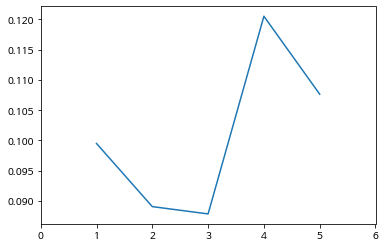

In [23]:
# degree 3이 가장 적당
# 차원이 증가함에 따라 계산량이 많아짐, 계산량이 많아지면 모델성능의 이득도 증가해야 함
# 차원이 증가할수록 모델에 대한 성능의 이득이 가장 많은 차원을 결정
plt.plot(evaluation_df["degree"], evaluation_df["mae"])
plt.xticks(list(range(len(evaluation_df)+2)))

plt.show()

# 선형회귀보다는 3차원으로 해석하는 것이 좋은데, 그렇게 해석하려고 하니 무엇이 문제인가?
# 선형회귀를 쓰자니 속도가 빠르고, 3차원으로 하자니 계산 양이 많아짐. -> 예측 속도에 대한 고민

- Modeling 3
> - xgboostRegressor에 CrossValidation 라이브러리 및 기본적인 하이퍼파라미터 설정을 통해 MAE스코어 계산
> - sklearn KFold 라이브러리를 이용하여 동일한 조건으로 xgboostRegressor에 대한 CrossValidation 진행한 MAE 스코어 계산
> - 두번의 BaseModel CrossValidation mae 스코어를 바탕으로 성능 개선 예정

In [44]:
def cal_xgb1(X,y):
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    params = {'booster':'gbtree',
                'gamma':0,
                'learning_rate':0.05,
                'max_depth':5,
                'min_child_weight':1,
                'n_jobs':-1,
                'objective':'reg:squaredlogerror',
                'reg_alpha':0,
              'eval_metric' : 'mae',
             'random_state':42}

    xgb_cv = xgb.cv(
      num_boost_round=100,
      params = params,
      dtrain = dtrain,
      nfold=5,
      as_pandas = True
    )
    
    return xgb_cv

In [45]:
cal_xgb1(X_train, y_train)

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.255011,0.000036,0.255012,0.000150
1,0.242221,0.000036,0.242223,0.000156
2,0.230449,0.000038,0.230451,0.000161
3,0.219691,0.000039,0.219693,0.000169
4,0.209806,0.000018,0.209808,0.000191
...,...,...,...,...
95,0.075370,0.000058,0.075411,0.000078
96,0.075321,0.000044,0.075363,0.000089
97,0.075282,0.000046,0.075323,0.000088
98,0.075234,0.000056,0.075276,0.000087


In [58]:
# eval_set 하이퍼파라미터를 사용하면 아래와 같이 결과를 출력합니다

def cal_xgb2(X,y):       # x 자리에 X, y 자리에 y를 넣어야 함.

    model = xgb.XGBRegressor(
        n_estimators=100,
        booster='gbtree',
        gamma=0,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_jobs=-1,
        objective='reg:squaredlogerror',
        # 주의: XGBRegressor는 sklearn mean_absolute_error 사용 (안하면 출력은 reg:squaredlogerror 값만 출력 됨)
        # xgb.cv 같은 경우 'mae'로 설정해야 됩니다.
        eval_metric=mean_absolute_error,
        reg_alpha=0,
        random_state=42)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

[0]	validation_0-rmsle:0.20499	validation_0-mean_absolute_error:0.25509
[1]	validation_0-rmsle:0.19448	validation_0-mean_absolute_error:0.24229
[2]	validation_0-rmsle:0.18490	validation_0-mean_absolute_error:0.23050
[3]	validation_0-rmsle:0.17621	validation_0-mean_absolute_error:0.21974
[4]	validation_0-rmsle:0.16828	validation_0-mean_absolute_error:0.20983
[5]	validation_0-rmsle:0.16107	validation_0-mean_absolute_error:0.20080
[6]	validation_0-rmsle:0.15440	validation_0-mean_absolute_error:0.19233
[7]	validation_0-rmsle:0.14826	validation_0-mean_absolute_error:0.18448
[8]	validation_0-rmsle:0.14260	validation_0-mean_absolute_error:0.17731
[9]	validation_0-rmsle:0.13741	validation_0-mean_absolute_error:0.17065
[10]	validation_0-rmsle:0.13256	validation_0-mean_absolute_error:0.16430
[11]	validation_0-rmsle:0.12807	validation_0-mean_absolute_error:0.15847
[12]	validation_0-rmsle:0.12392	validation_0-mean_absolute_error:0.15304
[13]	validation_0-rmsle:0.12007	validation_0-mean_absolute_er

[13]	validation_0-rmsle:0.12013	validation_0-mean_absolute_error:0.14799
[14]	validation_0-rmsle:0.11658	validation_0-mean_absolute_error:0.14327
[15]	validation_0-rmsle:0.11329	validation_0-mean_absolute_error:0.13878
[16]	validation_0-rmsle:0.11021	validation_0-mean_absolute_error:0.13460
[17]	validation_0-rmsle:0.10739	validation_0-mean_absolute_error:0.13069
[18]	validation_0-rmsle:0.10478	validation_0-mean_absolute_error:0.12703
[19]	validation_0-rmsle:0.10241	validation_0-mean_absolute_error:0.12371
[20]	validation_0-rmsle:0.10018	validation_0-mean_absolute_error:0.12057
[21]	validation_0-rmsle:0.09812	validation_0-mean_absolute_error:0.11765
[22]	validation_0-rmsle:0.09620	validation_0-mean_absolute_error:0.11486
[23]	validation_0-rmsle:0.09441	validation_0-mean_absolute_error:0.11227
[24]	validation_0-rmsle:0.09279	validation_0-mean_absolute_error:0.10988
[25]	validation_0-rmsle:0.09131	validation_0-mean_absolute_error:0.10767
[26]	validation_0-rmsle:0.08987	validation_0-mean_a

[26]	validation_0-rmsle:0.08983	validation_0-mean_absolute_error:0.10548
[27]	validation_0-rmsle:0.08857	validation_0-mean_absolute_error:0.10357
[28]	validation_0-rmsle:0.08740	validation_0-mean_absolute_error:0.10176
[29]	validation_0-rmsle:0.08628	validation_0-mean_absolute_error:0.10007
[30]	validation_0-rmsle:0.08523	validation_0-mean_absolute_error:0.09846
[31]	validation_0-rmsle:0.08427	validation_0-mean_absolute_error:0.09699
[32]	validation_0-rmsle:0.08339	validation_0-mean_absolute_error:0.09563
[33]	validation_0-rmsle:0.08252	validation_0-mean_absolute_error:0.09428
[34]	validation_0-rmsle:0.08175	validation_0-mean_absolute_error:0.09306
[35]	validation_0-rmsle:0.08101	validation_0-mean_absolute_error:0.09190
[36]	validation_0-rmsle:0.08033	validation_0-mean_absolute_error:0.09083
[37]	validation_0-rmsle:0.07972	validation_0-mean_absolute_error:0.08985
[38]	validation_0-rmsle:0.07918	validation_0-mean_absolute_error:0.08898
[39]	validation_0-rmsle:0.07869	validation_0-mean_a

[39]	validation_0-rmsle:0.07856	validation_0-mean_absolute_error:0.08810
[40]	validation_0-rmsle:0.07807	validation_0-mean_absolute_error:0.08730
[41]	validation_0-rmsle:0.07768	validation_0-mean_absolute_error:0.08662
[42]	validation_0-rmsle:0.07731	validation_0-mean_absolute_error:0.08596
[43]	validation_0-rmsle:0.07697	validation_0-mean_absolute_error:0.08538
[44]	validation_0-rmsle:0.07665	validation_0-mean_absolute_error:0.08483
[45]	validation_0-rmsle:0.07631	validation_0-mean_absolute_error:0.08426
[46]	validation_0-rmsle:0.07590	validation_0-mean_absolute_error:0.08368
[47]	validation_0-rmsle:0.07562	validation_0-mean_absolute_error:0.08320
[48]	validation_0-rmsle:0.07537	validation_0-mean_absolute_error:0.08277
[49]	validation_0-rmsle:0.07515	validation_0-mean_absolute_error:0.08235
[50]	validation_0-rmsle:0.07493	validation_0-mean_absolute_error:0.08199
[51]	validation_0-rmsle:0.07474	validation_0-mean_absolute_error:0.08165
[52]	validation_0-rmsle:0.07444	validation_0-mean_a

[52]	validation_0-rmsle:0.07446	validation_0-mean_absolute_error:0.08133
[53]	validation_0-rmsle:0.07417	validation_0-mean_absolute_error:0.08092
[54]	validation_0-rmsle:0.07401	validation_0-mean_absolute_error:0.08063
[55]	validation_0-rmsle:0.07384	validation_0-mean_absolute_error:0.08034
[56]	validation_0-rmsle:0.07368	validation_0-mean_absolute_error:0.08010
[57]	validation_0-rmsle:0.07347	validation_0-mean_absolute_error:0.07979
[58]	validation_0-rmsle:0.07327	validation_0-mean_absolute_error:0.07950
[59]	validation_0-rmsle:0.07310	validation_0-mean_absolute_error:0.07924
[60]	validation_0-rmsle:0.07295	validation_0-mean_absolute_error:0.07901
[61]	validation_0-rmsle:0.07280	validation_0-mean_absolute_error:0.07878
[62]	validation_0-rmsle:0.07271	validation_0-mean_absolute_error:0.07860
[63]	validation_0-rmsle:0.07257	validation_0-mean_absolute_error:0.07839
[64]	validation_0-rmsle:0.07249	validation_0-mean_absolute_error:0.07824
[65]	validation_0-rmsle:0.07241	validation_0-mean_a

In [59]:
cal_xgb2(X,y)

0.07523114872531737

- Modeling 4
> - LightGBMRegressor에 CrossValidation 라이브러리 및 기본적인 하이퍼파라미터 설정을 통해 MAE스코어 계산
> - sklearn KFold 라이브러리를 이용하여 동일한 조건으로 LightGBMRegressor에 대한 CrossValidation 진행한 MAE 스코어 계산
> - 두번의 BaseModel CrossValidation mae 스코어를 바탕으로 성능 개선 예정

In [52]:
def cal_LGBM1(X,y):       # x 자리에 X_train, y 자리에 y_train을 넣어야 함.
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = lgb.LGBMRegressor(X_train, label=y_train)
    params = {'objective': 'regression', # 회귀
            'verbose': 0,
            'max_depth': 5,
            'learning_rate': 0.05,
            'n_estimators': 100,
            'min_child_samples': 5,
            'subsample': 0.4}

    lgb_cv = lgb.cv(
      num_boost_round=100,
      params = params,
      fpreproc = dtrain,
      nfold=5,
    )
    
    return lgb_cv

In [68]:
def cal_LGBM1(X,y):       # x 자리에 X_train, y 자리에 y_train을 넣어야 함.
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = lgb.Dataset(data=X_train, label=y_train)
    params = {'objective': 'regression', # 회귀
            'verbose': 0,
            'max_depth': 5,
            'learning_rate': 0.05,
            'n_estimators': 100,
            'min_child_samples': 5,
            'subsample': 0.4}

    lgb_cv = lgb.cv(
        params,
        dtrain,
        num_boost_round=100,
        nfold = 5)
    
    return lgb_cv

# 왜 오류가 나는 걸까?

In [69]:
cal_LGBM1(X, y)

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [38]:
def cal_LGBM2(X,y):       # x 자리에 X, y 자리에 y를 넣어야 함.

    model = lgb.LGBMRegressor(
        objective = 'regression',
        verbose = 0,
        max_depth = 5,
        learning_rate= 0.05,
        n_estimators = 100,
        min_child_samples= 5,
        subsample = 0.4)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

In [39]:
cal_LGBM2(X,y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.0867856
[2]	valid_0's l2: 0.079773
[3]	valid_0's l2: 0.07343
[4]	valid_0's l2: 0.0677434
[5]	valid_0's l2: 0.0625459
[6]	valid_0's l2: 0.0578692
[7]	valid_0's l2: 0.053611
[8]	valid_0's l2: 0.0497844
[9]	valid_0's l2: 0.046324
[10]	valid_0's l2: 0.0431601
[11]	valid_0's l2: 0.0403276
[12]	valid_0's l2: 0.0377611
[13]	valid_0's l2: 0.0354053
[14]	valid_0's l2:

[24]	valid_0's l2: 0.0203938
[25]	valid_0's l2: 0.0196461
[26]	valid_0's l2: 0.0189707
[27]	valid_0's l2: 0.0183503
[28]	valid_0's l2: 0.0177614
[29]	valid_0's l2: 0.0172348
[30]	valid_0's l2: 0.0167851
[31]	valid_0's l2: 0.016343
[32]	valid_0's l2: 0.0159559
[33]	valid_0's l2: 0.0155995
[34]	valid_0's l2: 0.0152842
[35]	valid_0's l2: 0.0149756
[36]	valid_0's l2: 0.0146953
[37]	valid_0's l2: 0.0144217
[38]	valid_0's l2: 0.0141828
[39]	valid_0's l2: 0.0139522
[40]	valid_0's l2: 0.0137298
[41]	valid_0's l2: 0.0135372
[42]	valid_0's l2: 0.013362
[43]	valid_0's l2: 0.0132045
[44]	valid_0's l2: 0.013064
[45]	valid_0's l2: 0.0129271
[46]	valid_0's l2: 0.0128093
[47]	valid_0's l2: 0.0126967
[48]	valid_0's l2: 0.0125871
[49]	valid_0's l2: 0.0125014
[50]	valid_0's l2: 0.012422
[51]	valid_0's l2: 0.0123326
[52]	valid_0's l2: 0.012261
[53]	valid_0's l2: 0.0121959
[54]	valid_0's l2: 0.0121333
[55]	valid_0's l2: 0.012041
[56]	valid_0's l2: 0.0119884
[57]	valid_0's l2: 0.0119249
[58]	valid_0's l2: 0

[63]	valid_0's l2: 0.0115648
[64]	valid_0's l2: 0.0115288
[65]	valid_0's l2: 0.0114961
[66]	valid_0's l2: 0.0114621
[67]	valid_0's l2: 0.0114339
[68]	valid_0's l2: 0.0114082
[69]	valid_0's l2: 0.0113845
[70]	valid_0's l2: 0.0113618
[71]	valid_0's l2: 0.0113377
[72]	valid_0's l2: 0.0113113
[73]	valid_0's l2: 0.0112664
[74]	valid_0's l2: 0.0112421
[75]	valid_0's l2: 0.0112261
[76]	valid_0's l2: 0.0112103
[77]	valid_0's l2: 0.0111728
[78]	valid_0's l2: 0.0111375
[79]	valid_0's l2: 0.0111218
[80]	valid_0's l2: 0.011089
[81]	valid_0's l2: 0.0110758
[82]	valid_0's l2: 0.011063
[83]	valid_0's l2: 0.0110355
[84]	valid_0's l2: 0.0110245
[85]	valid_0's l2: 0.0110047
[86]	valid_0's l2: 0.0109961
[87]	valid_0's l2: 0.0109786
[88]	valid_0's l2: 0.0109658
[89]	valid_0's l2: 0.0109585
[90]	valid_0's l2: 0.0109428
[91]	valid_0's l2: 0.0109362
[92]	valid_0's l2: 0.0109252
[93]	valid_0's l2: 0.0109195
[94]	valid_0's l2: 0.0109062
[95]	valid_0's l2: 0.0108893
[96]	valid_0's l2: 0.0108848
[97]	valid_0's l

0.07493949686969936

##### 2차
1. 동맹 인원수에 따른 게임 방식 적용 : 
> - 아래의 column 각각에 대해 numerical column으로 변환 및 데이터프레임에 새로운 column으로 추가하여 시뮬레이션
> - matchType : matchType 데이터에 포함된 키워드 기준으로 분류
> - numGroup : numGroup 데이터 값을 기준으로 분류
> - groupId : 동일한 groupId를 갖는 데이터의 수를 집계하여 분류

2. 이상치 제거 적용
> - IQR 방식
> - 상위 0.5% 초과 수치에 대한 삭제하는 방식
> - boxplot을 통한 rough한 방식

#### 인원수에 따른 게임 방식 적용

In [108]:
# 대상 DataFrame

train_mt     # matchType column 적용
train_n      # numGroup column 적용
train_g      # group Id column 적용

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,groupcnt
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.000,0,0,161.80,2,0,0.7755,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.000,0,0,202.70,3,0,0.1667,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.000,0,0,49.75,2,0,0.1875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,4
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0000,0,0.000,0,0,81.70,6,0,0.2935,1
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0000,0,2.184,0,0,788.70,4,0,0.4815,4
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,4


In [47]:
# dataframe 기본 정리

# excols : 데이터프레임의 컬럼들 중 해당 컬럼들을 제외한 컬럼들을 리스트로 반환
def excols(df, cols):
    return [i for i in list(df.columns) if i not in cols]

# mkdf : 지정한 데이터프레임에서 해당 컬럼들의 데이터만 추출
def mkdf(df, cols):
    return df[cols]

# exdf : 지정한 데이터프레임에서 해당 컬럼들을 제외한 데이터만 추출
def exdf(df, cols):
    return df[excols(df,cols)]

# column 정리 : ['Id', 'groupId', 'matchId', 'matchType', 'killPlace', 'kill']
#    objective columns 제거
#    'killPlace' column 제거
#    'kills' column 제거

# train_mt는 'matchType'을 직접 변경했기 때문에 해당 column을 제거하면 안됨.
rm_cols_mt = ['Id', 'groupId', 'matchId', 'killPlace', 'kill']

rm_cols = ['Id', 'groupId', 'matchId', 'matchType', 'killPlace', 'kill']

In [48]:
# 인원수를 column으로 변환한 기본 DataFrame

train_mt = exdf(train_mt, rm_cols_mt)      # matchType column 적용

train_n = exdf(train_n, rm_cols)      # numGroup column 적용

train_g = exdf(train_n, rm_cols)      # group Id column 적용


#### 이상치 제거 방식 3가지

In [49]:
# 이상치 제거 1. IQR방식 이용

def outlier1(df):
    df = df.copy()
    remove = []
    for i in df.columns[:-1]:

        quantile_25 = np.percentile(df[i].values, 25)
        quantile_75 = np.percentile(df[i].values, 75)

        IQR = quantile_75 - quantile_25
        IQR_weight = IQR*1.5

        lowest = quantile_25 - IQR_weight
        highest = quantile_75 + IQR_weight

        outlier_idx = df[i][ (df[i] < lowest) | (df[i] > highest) ].index
        df = df.drop(outlier_idx, axis=0)
        remove.append(len(outlier_idx))
        print(f'{i} 컬럼의 이상치로 {len(outlier_idx)}개의 data를 삭제하였습니다.')
    print(f'데이터프레임의 이상치로 총 {sum(remove)}개의 data를 삭제하였습니다.')
    return df  

# 참고 : https://hwi-doc.tistory.com/entry/IQR-방식을-이용한-이상치-데이터Outlier-제거

In [50]:
outlier1(train_mt)

assists 컬럼의 이상치로 779306개의 data를 삭제하였습니다.
boosts 컬럼의 이상치로 462555개의 data를 삭제하였습니다.
damageDealt 컬럼의 이상치로 140354개의 data를 삭제하였습니다.
DBNOs 컬럼의 이상치로 31550개의 data를 삭제하였습니다.
headshotKills 컬럼의 이상치로 261897개의 data를 삭제하였습니다.
heals 컬럼의 이상치로 639469개의 data를 삭제하였습니다.
killPoints 컬럼의 이상치로 0개의 data를 삭제하였습니다.
kills 컬럼의 이상치로 380965개의 data를 삭제하였습니다.
killStreaks 컬럼의 이상치로 0개의 data를 삭제하였습니다.
longestKill 컬럼의 이상치로 0개의 data를 삭제하였습니다.
matchDuration 컬럼의 이상치로 255개의 data를 삭제하였습니다.
matchType 컬럼의 이상치로 0개의 data를 삭제하였습니다.
maxPlace 컬럼의 이상치로 316196개의 data를 삭제하였습니다.
numGroups 컬럼의 이상치로 845개의 data를 삭제하였습니다.
rankPoints 컬럼의 이상치로 6개의 data를 삭제하였습니다.
revives 컬럼의 이상치로 54338개의 data를 삭제하였습니다.
rideDistance 컬럼의 이상치로 169508개의 data를 삭제하였습니다.
roadKills 컬럼의 이상치로 0개의 data를 삭제하였습니다.
swimDistance 컬럼의 이상치로 23899개의 data를 삭제하였습니다.
teamKills 컬럼의 이상치로 11527개의 data를 삭제하였습니다.
vehicleDestroys 컬럼의 이상치로 242개의 data를 삭제하였습니다.
walkDistance 컬럼의 이상치로 140141개의 data를 삭제하였습니다.
weaponsAcquired 컬럼의 이상치로 12969개의 data를 삭제하였습니다.
winPoints 컬럼의 이상치로 0개의 data를 삭제하였습니다.


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.0,...,0,0.0,0,0.0,0,0,244.80,1,1466,0.4444
3,0,0,32.90,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,202.70,3,0,0.1667
6,0,0,0.00,0,0,0,1262,0,0,0.0,...,0,0.0,0,0.0,0,0,13.50,1,1497,0.0000
8,0,0,51.60,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,799.90,4,0,0.3704
9,0,0,37.27,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,65.67,1,0,0.2143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446943,0,0,0.00,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,57.59,2,0,0.1111
4446945,0,0,0.00,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,57.19,1,0,0.1875
4446947,0,0,0.00,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,631.10,4,0,0.3830
4446951,0,0,0.00,0,0,0,0,0,0,0.0,...,0,0.0,0,0.0,0,0,44.90,1,0,0.1000


In [52]:
train_n

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [53]:
# 99% 초과 수치에 대한 삭제


# 함수 생성
#    1) 지정한 column에서 원하는 %의 수치에 대한 상위값 추출하여 list로 반환
#    2) 지정한 column 각각에 대해 상위값보다 큰 값들은 모두 제거

def outlier2(df, want_per):
    df = df.copy()
    columns_list = df.columns[:-1]
    remove = []    
    value_list = []
    
    for i in columns_list:
        value_list.append(df[i].quantile(want_per))
    
    for j in range(len(value_list)):
        outlier_idx = df[columns_list[j]][df[columns_list[j]] > value_list[j]].index
        df = df.drop(outlier_idx, axis=0)
        remove.append(len(outlier_idx))
        print(f'{columns_list[j]} 컬럼의 이상치로 값이 {value_list[j]} 보다 큰 {len(outlier_idx)}개의 data를 삭제하였습니다.')
    print(f'데이터프레임의 이상치로 총 {sum(remove)}개의 data를 삭제하였습니다.')
    return df

In [54]:
outlier2(train_n, 0.995)

assists 컬럼의 이상치로 14639개의 data를 삭제하였습니다.
boosts 컬럼의 이상치로 15079개의 data를 삭제하였습니다.
damageDealt 컬럼의 이상치로 17495개의 data를 삭제하였습니다.
DBNOs 컬럼의 이상치로 6335개의 data를 삭제하였습니다.
headshotKills 컬럼의 이상치로 8440개의 data를 삭제하였습니다.
heals 컬럼의 이상치로 18254개의 data를 삭제하였습니다.
killPoints 컬럼의 이상치로 19220개의 data를 삭제하였습니다.
kills 컬럼의 이상치로 2910개의 data를 삭제하였습니다.
killStreaks 컬럼의 이상치로 3790개의 data를 삭제하였습니다.
longestKill 컬럼의 이상치로 17350개의 data를 삭제하였습니다.
matchDuration 컬럼의 이상치로 21396개의 data를 삭제하였습니다.
maxPlace 컬럼의 이상치로 12834개의 data를 삭제하였습니다.
numGroups 컬럼의 이상치로 0개의 data를 삭제하였습니다.
rankPoints 컬럼의 이상치로 19775개의 data를 삭제하였습니다.
revives 컬럼의 이상치로 17815개의 data를 삭제하였습니다.
rideDistance 컬럼의 이상치로 19257개의 data를 삭제하였습니다.
roadKills 컬럼의 이상치로 10712개의 data를 삭제하였습니다.
swimDistance 컬럼의 이상치로 20365개의 data를 삭제하였습니다.
teamKills 컬럼의 이상치로 7514개의 data를 삭제하였습니다.
vehicleDestroys 컬럼의 이상치로 848개의 data를 삭제하였습니다.
walkDistance 컬럼의 이상치로 18483개의 data를 삭제하였습니다.
weaponsAcquired 컬럼의 이상치로 10390개의 data를 삭제하였습니다.
winPoints 컬럼의 이상치로 13863개의 data를 삭제하였습니다.
데이터프레임의 이상치로 총 296764개의 data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [55]:
# boxplot을 통해 rough한 방법으로 이상치 제거

# boosts : 25 이상 제거
# damageDealt : 3200 이상 제거
# heals : 60 이상 제거
# kills : 25 이상 제거
# walkDistance : 15000 이상 제거
# weaponAcquired : 150 이상 제거

def outlier3(df, columns_list, std_list):
    df = df.copy()
    remove = []    
    
    for j in range(len(std_list)):
        outlier_idx = df[columns_list[j]][df[columns_list[j]] > std_list[j]].index
        df = df.drop(outlier_idx, axis=0)
        remove.append(len(outlier_idx))
        print(f'{columns_list[j]} 컬럼의 이상치로 {len(outlier_idx)}개의 data를 삭제하였습니다.')
    print(f'데이터프레임의 이상치로 총 {sum(remove)}개의 data를 삭제하였습니다.')
    return df

In [56]:
train_g

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


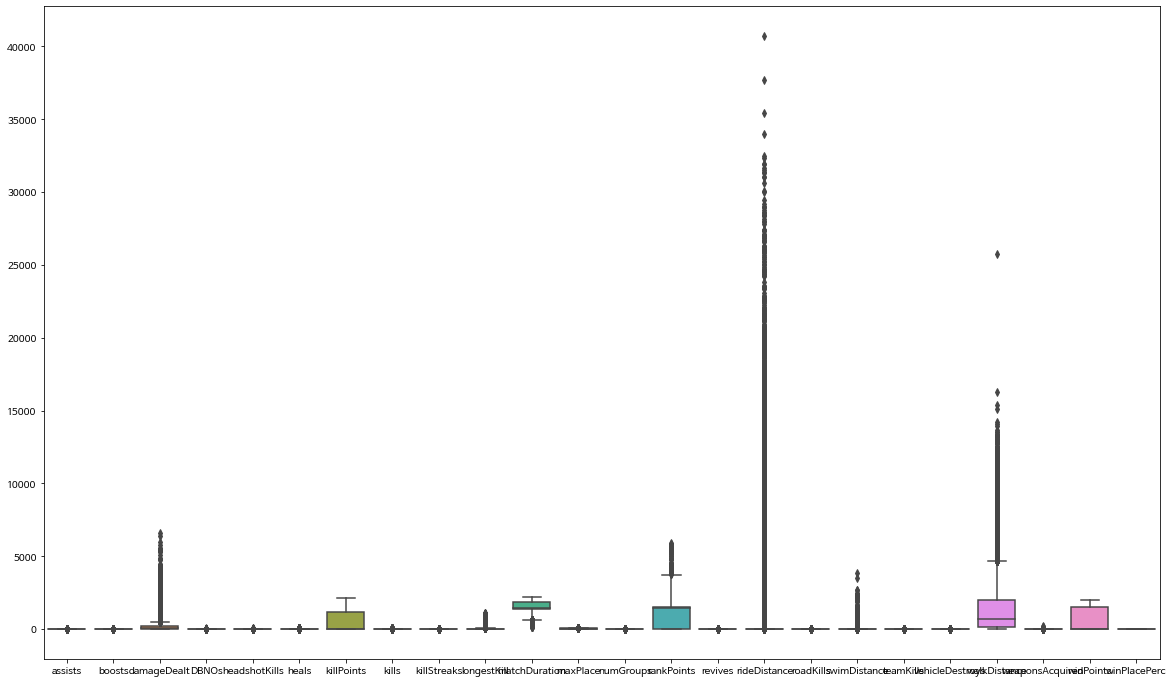

In [58]:
fig = plt.figure(figsize=(20,12))
sns.boxplot(data=train_g)
plt.show()

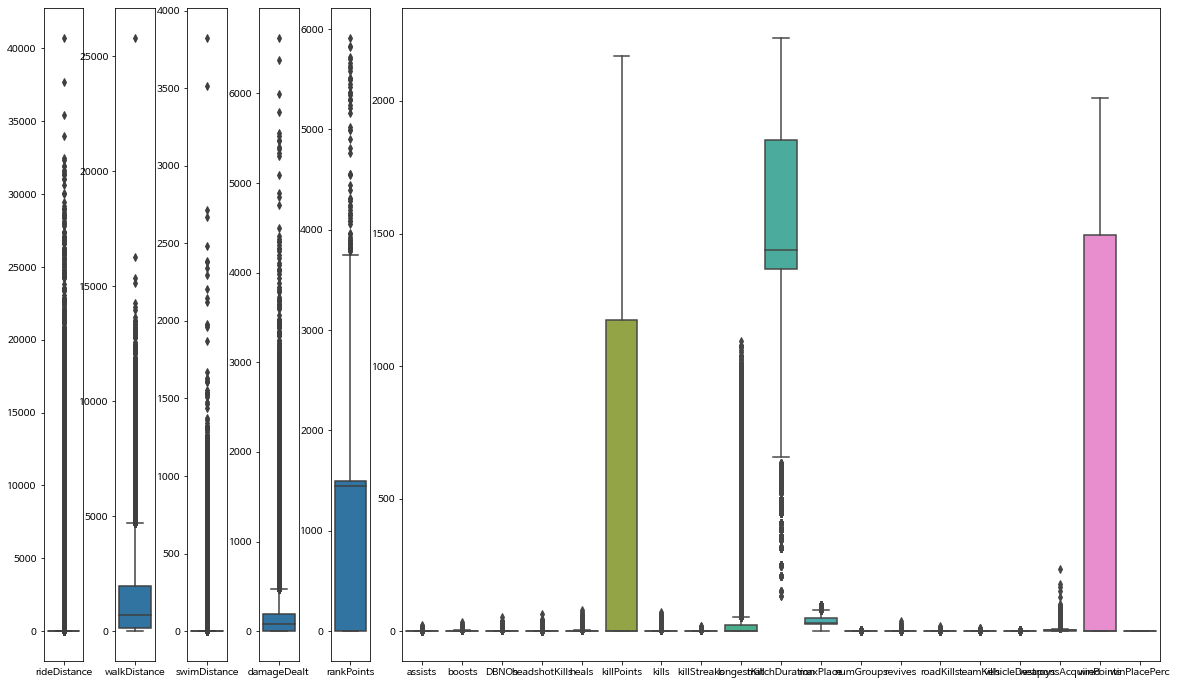

In [59]:
# 해당 데이터프레임의 boxplot 체크

fig = plt.figure(figsize=(20,12))

spec = grs.GridSpec(ncols=6, nrows=1,width_ratios=[1, 1, 1, 1, 1, 19])

ax01 = fig.add_subplot(spec[0])
sns.boxplot(data=train_g['rideDistance'])
plt.xticks([0], ['rideDistance'])

ax02 = fig.add_subplot(spec[1])
sns.boxplot(data=train_g['walkDistance'])
plt.xticks([0], ['walkDistance'])

ax03 = fig.add_subplot(spec[2])
sns.boxplot(data=train_g['swimDistance'])
plt.xticks([0], ['swimDistance'])

ax04 = fig.add_subplot(spec[3])
sns.boxplot(data=train_g['damageDealt'])
plt.xticks([0], ['damageDealt'])

ax05 = fig.add_subplot(spec[4])
sns.boxplot(data=train_g['rankPoints'])
plt.xticks([0], ['rankPoints'])

ax06 = fig.add_subplot(spec[5])
sns.boxplot(data=train_g.drop(columns =['rideDistance', 'walkDistance', 'swimDistance', 'damageDealt', 'rankPoints']))

plt.show()

In [64]:
def boxpl(df):
    for i in df.columns[:-1]:
        fig = plt.figure(figsize=(20,2))
        sns.boxplot(df[i])
        plt.show()
    return None

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


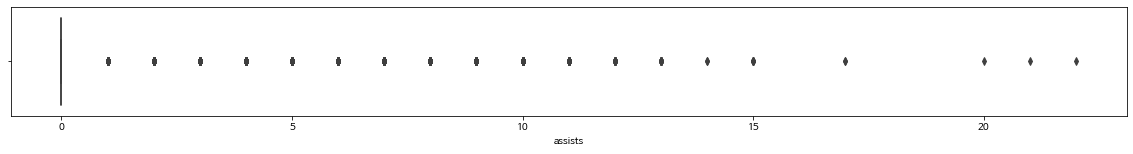

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


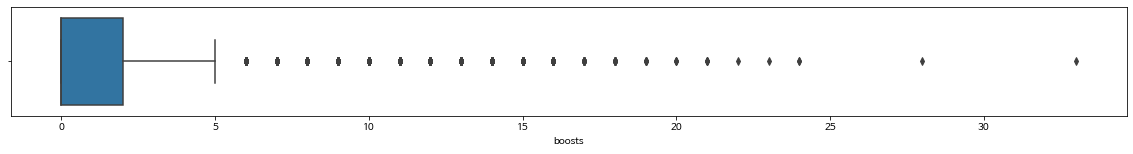

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


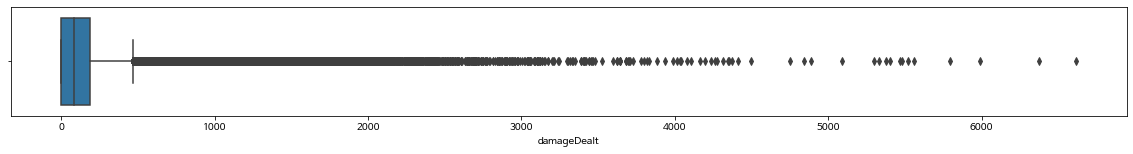

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


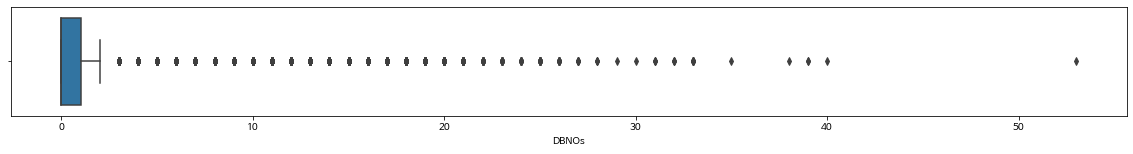

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


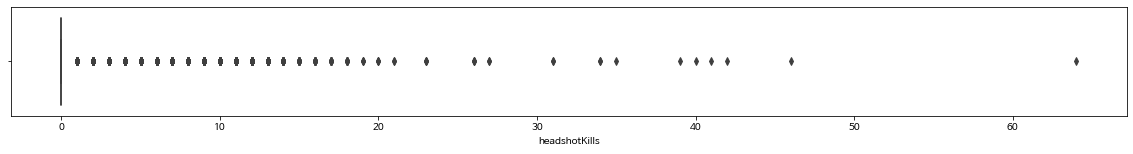

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


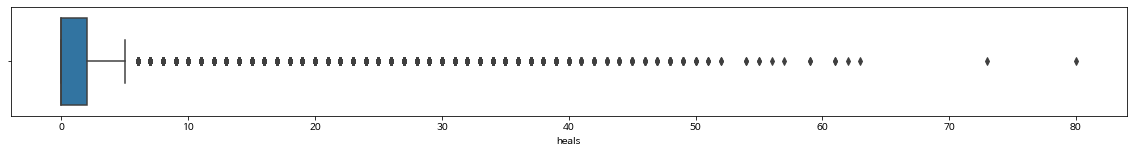

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


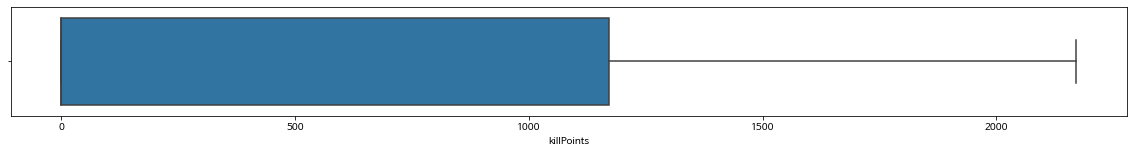

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


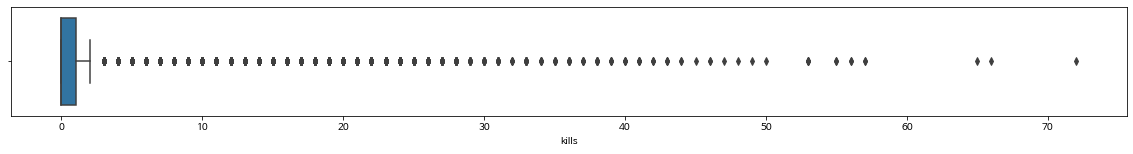

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


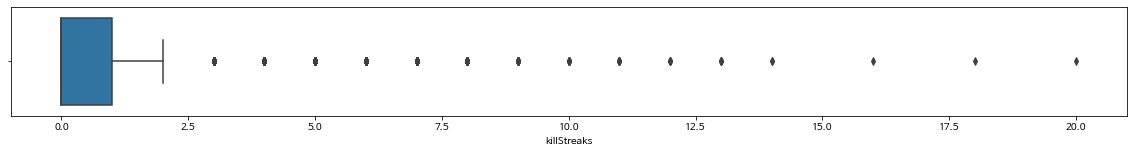

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


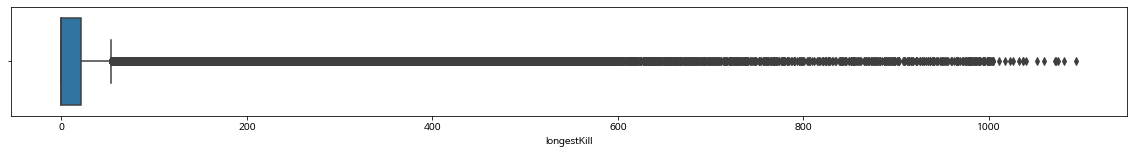

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


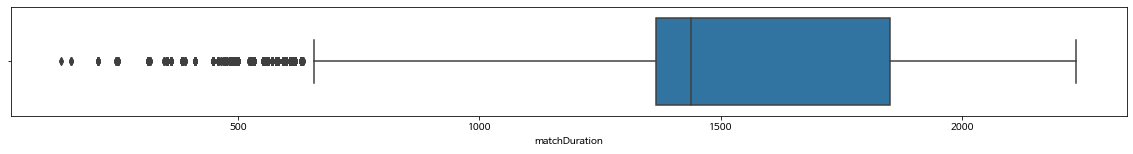

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


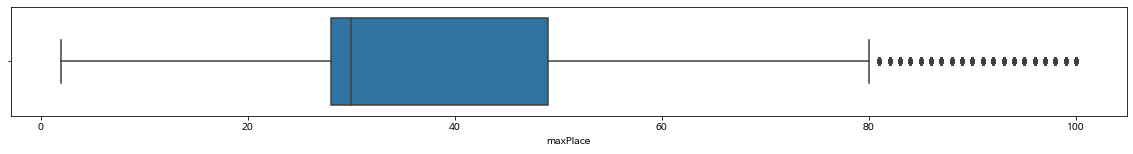

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


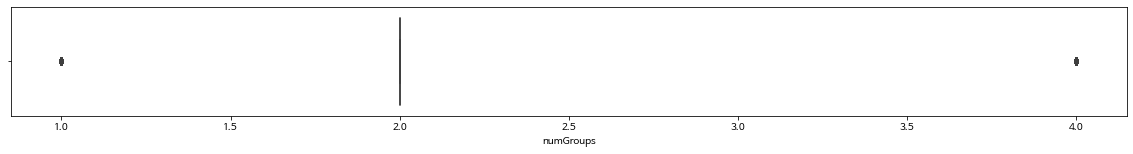

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


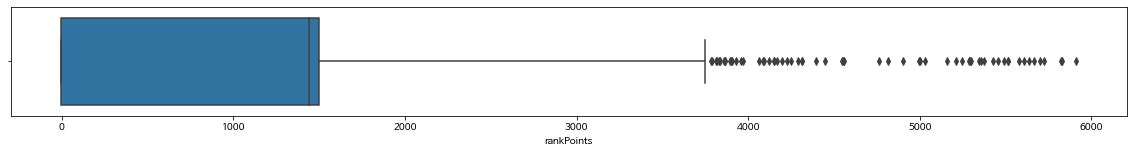

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


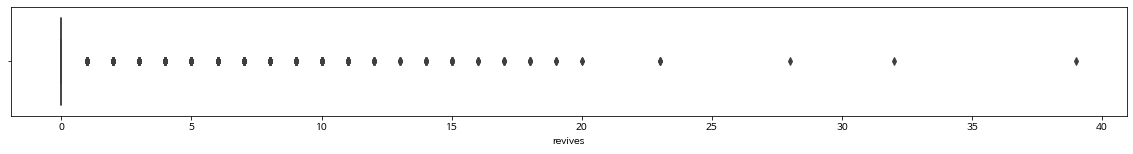

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


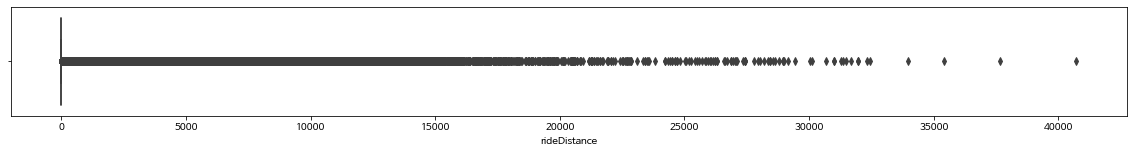

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


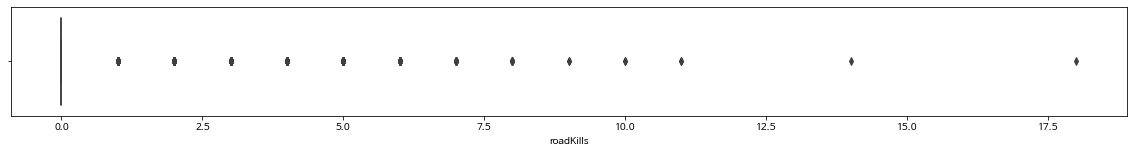

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


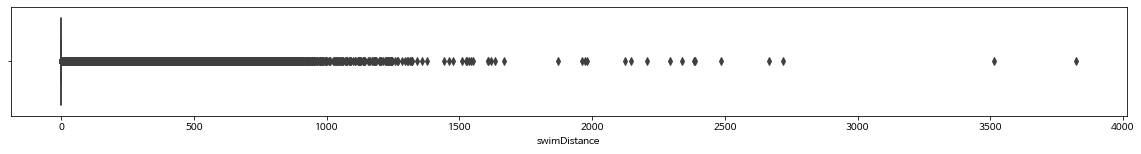

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


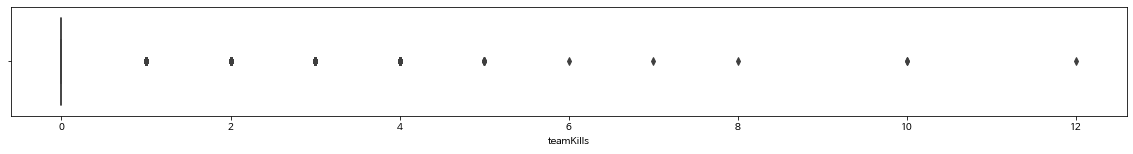

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


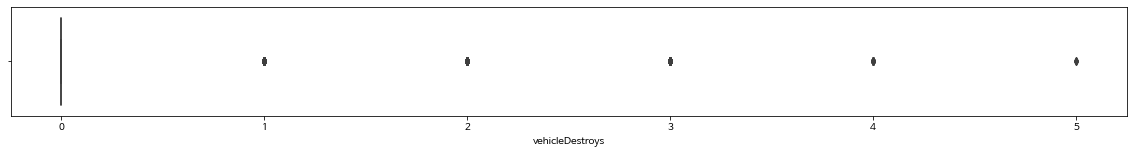

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


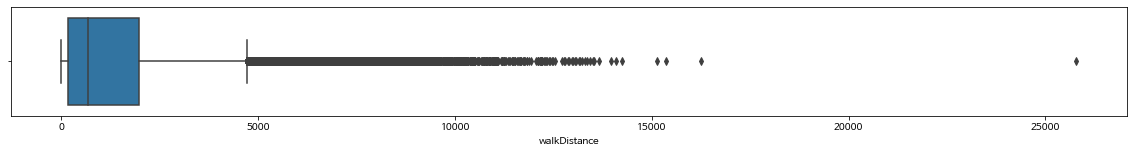

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


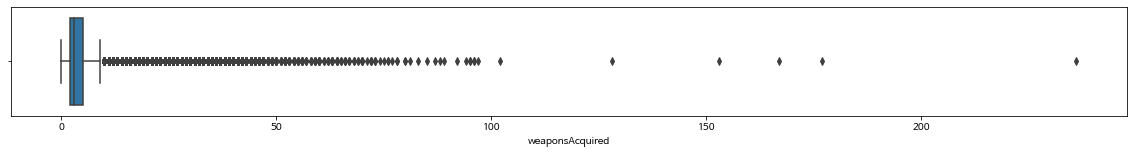

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


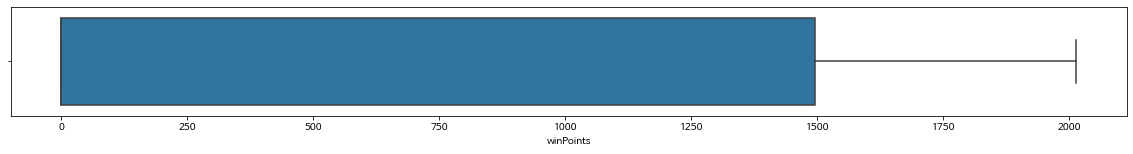

In [65]:
boxpl(train_g)

In [113]:
# excols : 데이터프레임의 컬럼들 중 해당 컬럼들을 제외한 컬럼들을 리스트로 반환
def excols(df, cols):
    return [i for i in list(df.columns) if i not in cols]

# mkdf : 지정한 데이터프레임에서 해당 컬럼들의 데이터만 추출
def mkdf(df, cols):
    return df[cols]

# exdf : 지정한 데이터프레임에서 해당 컬럼들을 제외한 데이터만 추출
def exdf(df, cols):
    return df[excols(df,cols)]

In [139]:
# 연속형 변수를 범주형 변수로 변환하기

# 분위수 구간 나누기
def find(cnt):               # cnt : 나눌 구간 개수
    return [round((1/cnt)*i,2) for i in range(cnt+1)]

# 분위수 구간 리스트 만들기
def blabel(cnt):
    bins = find(cnt)
    bins_label = []
    for i in range(len(bins)-1):
        if i <= len(bins)-3:
            bins_label.append(str(bins[i])+' 이상 ~'+str(bins[i+1])+' 미만')
        if i == len(bins)-2:
            bins_label.append(str(bins[i])+' 이상 ~')
    return bins_label

# 분위수 구간에 해당하는 데이터프레임 값에 대한 리스트 만들기
def bval(df, column, cnt):
    bval = []
    for i in find(cnt):
        bval.append(df[column].quantile(i))
    return bval

# step 1. 데이터프레임의 분위수 기준 값으로 컬럼 자르기
def quant(df, column, cnt):                         # column : 작은 따옴표로 감싸서 입력, cnt : 나눌 구간 개수 입력
#     bins = find(cnt)
    blabels = blabel(cnt)                           # bins: 지정 컬럼에서 분위수에 해당하는 값들을 담을 리스트
    bvals = bval(df, column, cnt)

    df[column] = pd.cut(df[column], bvals, labels = blabels)
    df[column].fillna(blabels[0], inplace=True)
    return df

# step 1. 데이터프레임의 분위수 기준 값으로 컬럼 자르기
def quant2(df, column, cnt):                         # column : 작은 따옴표로 감싸서 입력, cnt : 나눌 구간 개수 입력
#     bins = find(cnt)
    blabels = list(range(1,cnt+1))                          # bins: 지정 컬럼에서 분위수에 해당하는 값들을 담을 리스트
    bvals = bval(df, column, cnt)

    df[column] = pd.cut(df[column], bvals, labels = blabels)
    df[column].fillna(blabels[0], inplace=True)
    return df